## `Занятие 08: Реккурентные нейронные сети`

#### `Москва, 2024`

## `1. Основы рекуррентных нейронных сетей`

### `Для каких задач они нужны?`

&nbsp;

<details>
  <summary>Нажмите, когда будете готовы увидеть ответ</summary>
    <br>
    Если коротко, то для любых задач, где обрабатываются последовательности. В частности:
    <ol>
      <li>Моделирование естественных языков.</li>
      <li>Анализ и генерация звука.</li>
      <li>Предсказание или анализ временных рядов.</li>
    </ol> 
</details>

## `Основные модели работы с последовательностями`

<table><tr>
<td> 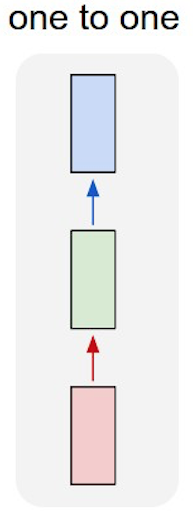 </td>
<td> 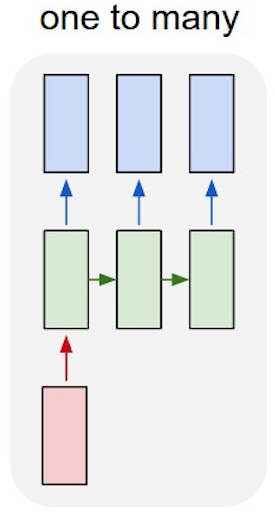 </td>
<td> 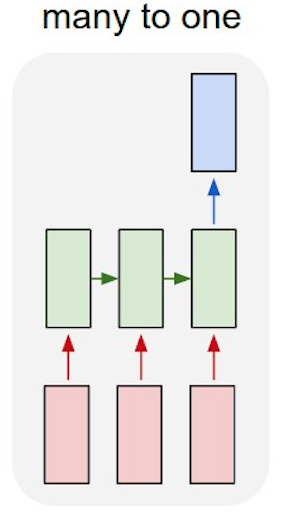 </td>
</tr></table>


<table><tr>
<td> 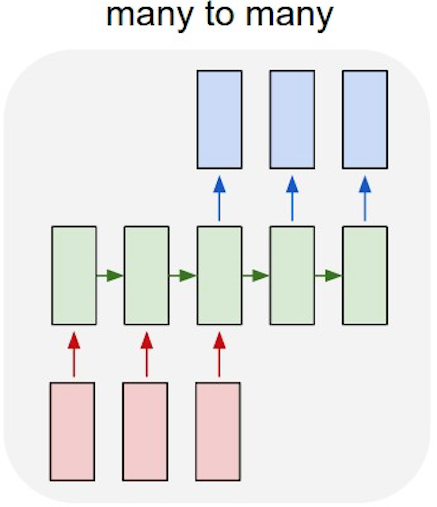 </td>
<td> 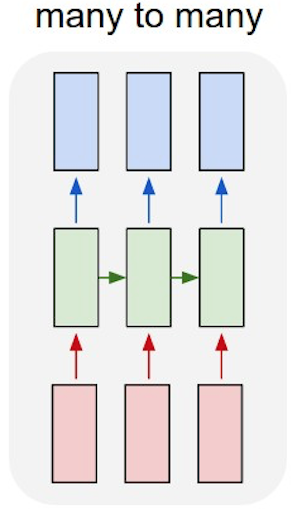 </td>
</tr></table>


1) One-to-one: На вход один объект и на выходе тоже (вырожденный случай)

2) One-to-many: На вход подается один объект, на выходе последовательность объектов

3) Many-to-one: На вход подается последовательность объектов, на выходе один объект

4) Many-to-many: На входе и выходе последовательности нефиксированной длины

###  `Приведите примеры задач каждого вида`

&nbsp;

<details>
  <summary>Нажмите, когда будете готовы увидеть ответ</summary>
    <ol>
      <li>One-to-one: классификация картинок</li>
      <li>One-to-many: создание подписей к картинкам (image captioning)</li>
      <li>Many-to-one: классификация текстов или видео</li>
      <li>Many-to-many: машинный перевод, суммаризация</li>
    </ol> 
</details>

##  `Какие требования мы можем уже сейчас предъявить к архитектуре для работы с последовательностями?`


&nbsp;

<details>
  <summary>Нажмите, когда будете готовы увидеть ответ</summary>
    <ol>
      <li>Parameter sharing. Если в картинках такое хорошо работает, то хотелось бы что-то такое и тут</li>
      <li>В идеале иметь возможность обрабатывать последовательности любой длины</li>
      <li>Изображение однородно, в нём нет предпочтительных направлений, тогда как текст пишется и читается последовательно. Нам может показаться, что это стоит использовать: при обработке очередного токена обращаться к предыдущим, как к его контексту</li>
    </ol> 
</details>

## `А что мы уже умеем?`

В целом, когда мы понимаем какие задачи хотим решать, а также какие требования к архитектуре выдвинуты, стоит посмотреть, а что же уже существует для подобных и аналогичных задач. Как минимум, мы найдем источник для вдохновения

1. Модель Авторегрессии

Временной ряд $(X_1, ..., X_t, X_{t+1}, ...)$ называется AR(k), если существует такой набор $\alpha_1, ..., \alpha_k$, что

$$
X_t = \sum_{i=1}^{k} X_{t-i} \alpha_i + \varepsilon_t,
$$

где $ \varepsilon_t \sim \mathcal{N}(0,1)$

На диаграмме изображён пример AR(2)
<div>
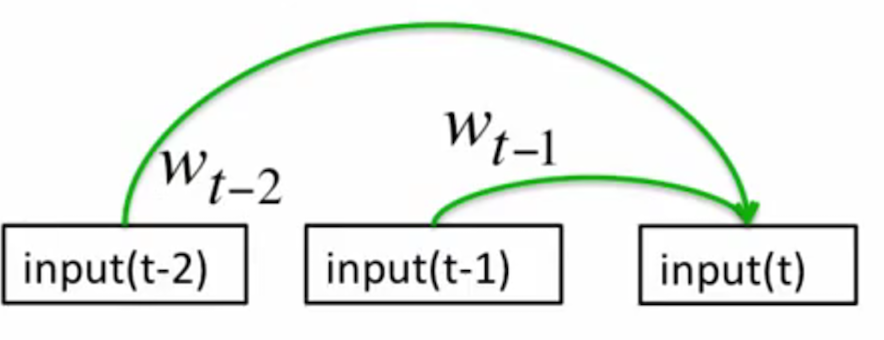
</div>

2. Скрытые модели Маркова ( графическая модель )

<div>
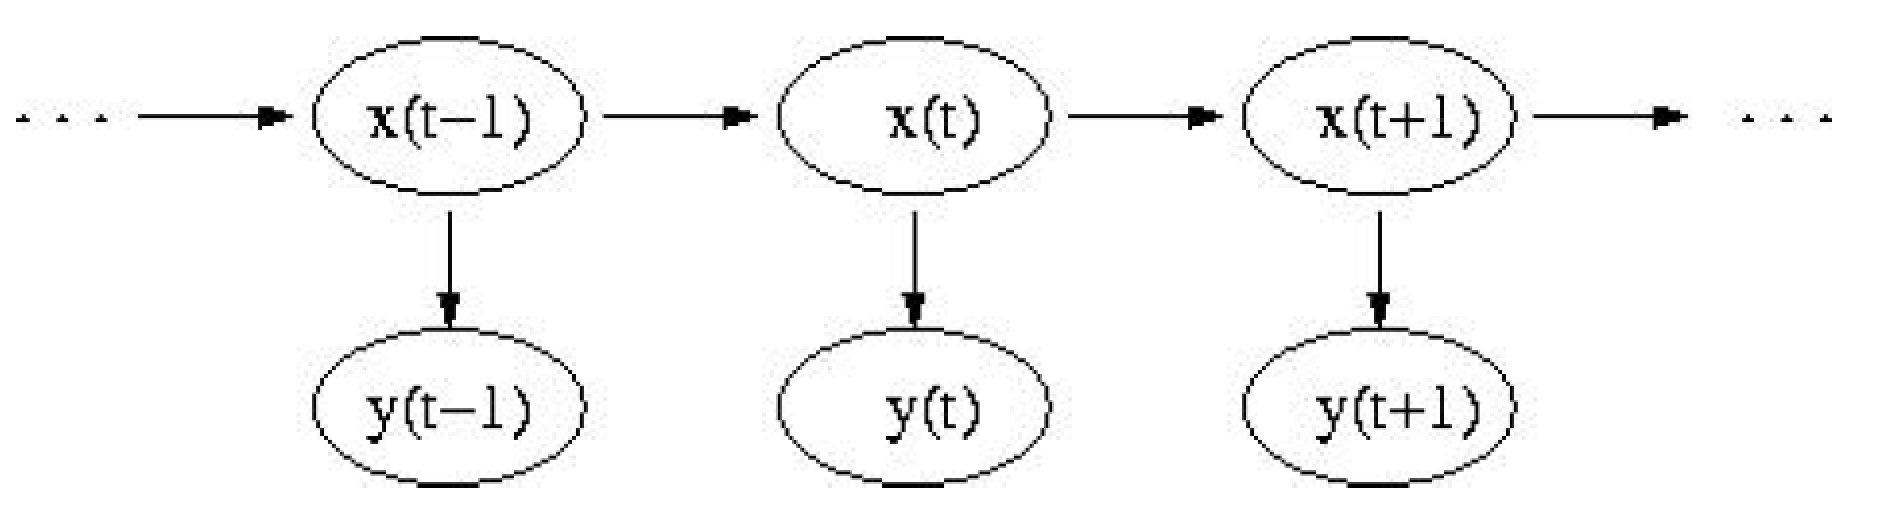
</div>

Предполагается, что есть некоторое скрытое состояние, которое меняется на каждом шаге. Состояние определяет способ получения выходного значения. Так как соседние состояния зависимы, то зависимы и соседние выходы, однако неявно.

## `Рекуррентные нейронные сети`

Как можно видеть, подобные модели уже есть. Осталось их только перенести на нейронки, и будет хорошо. Давайте это сделаем. Что для этого нужно сделать?

1. Предложить архитектуру

2. Понять, как обучать

3. Посмотреть особенности обучения

### Обозначения
1. Длина  последовательности $T$
2. Размерность проекции последовательности в некоторый момент времени - $n_{input}$
3. $X = (\hat{x}_1, ... \hat{x}_{T}) \in \mathbb{R}^{n_{input} \times T} \text{, где }  \hat{x}_1 = (x_{1;1}, ..., x_{n_{input};1})$ - представление ряда (одного объекта) как последовательности проекций.

Для простоты сейчас будем считать, что длина всех последовательностей $T$ в выборке совпадает. За $X_{t}$ обозначим батч, состоящий из элементов временных рядов батча в момент времени $t$


Пусть дана последовательность $\hat{x}_1,...,\hat{x}_T$ и откликов $y_1,...y_T$. Задача заключается в предсказании последовательности значений $\hat{y}_t$ исходя из $\hat{x}_1,...,\hat{x}_t$. Тогда в общем случае рекуррентная нейронная сеть имеет вид:

$$
\begin{split}
    h_{t} & = f_{h} (X_{t}, h_{t-1}) \\
    \hat{y}_{t} &= f_{o}(h_{t})\\ 
    t &= 1, 2,..., T\\
    h_0 &= ?
\end{split}
$$

Какое значение можно выбрать для инциализации скрытого состояния? 

&nbsp;

<details>
  <summary>Нажмите, когда будете готовы увидеть ответ</summary>
    В целом, хороший выбор - 0, так как изначально мы не имеем никакой истории. Но все зависит от задачи. Например, иногда может возникнуть желание обучить $h_0$, а иногда будет желание положить туда какую-то дополнительную информацию. Например, какую-то информацию о картинке для задачи image captioning
</details>

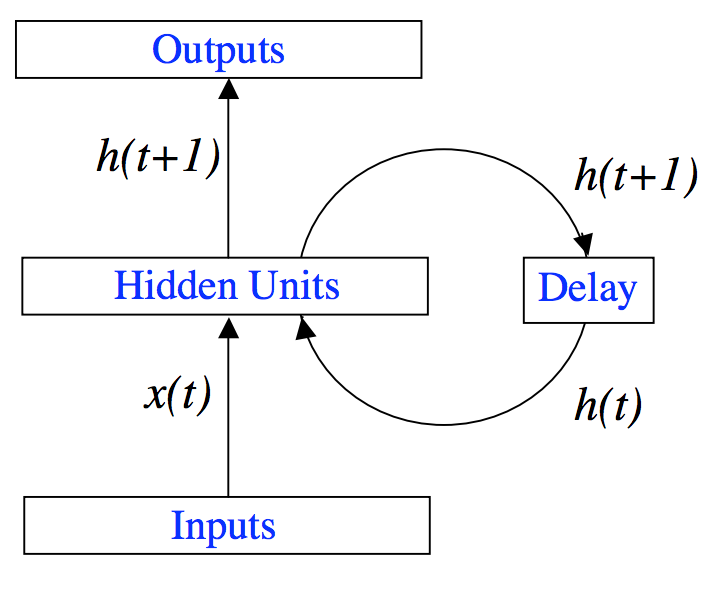

Собственно, осталось только выбрать функции $f$. Использовать в качестве них схему: линейность + нелинейность звучит хорошо, так как это работало ранее. Давайте так и делать. Тогда легко получается стандартная рекуррентная нейронная сеть (сеть Элмана):

$$
\begin{split}
h_{t} & = f_{h} (X_{t}, h_{t-1}) = \text{tanh}(W_{ih}^{T} \cdot X_{t} + W_{hh}^{T}\cdot h_{t-1} +b_{h})\\
    \hat{y}_{t} &= f_{o}(h_{t}) = \text{softmax}(W_{oh}^{T}\cdot h_{t} + b_{y})
\end{split}
$$

где $W_{ih}$, $W_{hh}$ и $W_{oh}$ - матрицы весов соответственно для входа, скрытых состояний и выхода.

Почему при получении $h_{t}$ мы используем только один bias?

&nbsp;

<details>
  <summary>Нажмите, когда будете готовы увидеть ответ</summary>
    Потому что если использовать два смещения, то после суммирования они превратятся в по сути одно
</details>

<div class="alert alert-danger">
Выходной слой $y_t = f(h_{t})$ обычно не включается в саму модель рекуррентной сети. С одной стороны, в зависимости от задачи мы можем хотеть использовать регрессию, либо более глубокую модель классификации.
</div>

Удовлетворяем ли мы выдвинутым ранее требованиям?

&nbsp;

<details>
  <summary>Нажмите, когда будете готовы увидеть ответ</summary>
    <ol>
      <li>Parameter sharing. Есть такое, мы используем одни и те же матрицы на каждом шаге</li>
      <li>В идеале иметь возможность обрабатывать последовательности любой длины. Да, в силу того, как организовано разделение параметров, мы можем пропускать последовательности хоть бесконечной длины</li>
      <li>Изображение однородно, в нём нет предпочтительных направлений, тогда как текст пишется и читается последовательно. Нам может показаться, что это стоит использовать: при обработке очередного токена обращаться к предыдущим, как к его контексту. Да, мы буквально моделируем чтение слева направо, запоминая то, что прочитали в скрытом состоянии</li>
    </ol> 
</details>

#### `Небольшой трюк, повышающий эффективность реализации модели Элмана`

Пусть $n_{neurons}$ - размерность скрытого состояния (количество нейронов в скрытом состоянии).

1. Матрицы весов $W_{ih}$ и $W_{hh}$ можно конкатенировать вертикально и получить $W$ размера $(n_{inputs} +  n_{neurons}) \times  n_{neurons}$.
2. Обозначим конкатенацию входа  $X_{t}$ и скрытого состояния $h_{t-1}$,размера $m \times (n_{inputs} + n_{neurons})$ как $[X_{t}, h_{t-1}]$.

Тогда новое состояние  можно вычислить по обновлённой формуле:
$$
\begin{split}
    h_{t} & = \text{tanh}(X_{t}\cdot W_{ih} + h_{t-1}\cdot  W_{hh} + b_{h})\\
    &=\text{tanh}( [X_{t}, h_{t-1}] \cdot W + b_{h})\\
\end{split}
$$


Резюмируем:

1. $X_{t}$ размера $m \times n_{inputs}$ матрица с проекциями всех последовательностей в момент $t$.
2. $h_{t-1}$ размера $m \times n_{neurons}$ матрица с скрытыми состояниями для **каждого** объекта в батче в момент $t$.
3. $W_{ih}$ размера $n_{inputs} \times n_{neurons}$ матрица весов между входом и текущим скрытым слоем.
4. $W_{hh}$ размера $n_{neurons} \times n_{neurons}$ матрица весов между прошлым и текущим скрытыми слоями.
5. $W_{oh}$ размера $n_{neurons} \times n_{output}$ матрица весов между текущим скрытым состоянием и выходом.
6. $b_{h}$ вектор размера $n_{neurons}$ смещение для обновление скрытого слоя.
7. $b_{o}$ вектор размера $n_{output}$ смещение для вычисления выхода модели.
8. $y_{t}$ размера $m \times n_{output}$ матрица выхода модели в момент $t$ для **каждого** объекта в батче. 


### Развертывание рекуррентной сети:

<div>
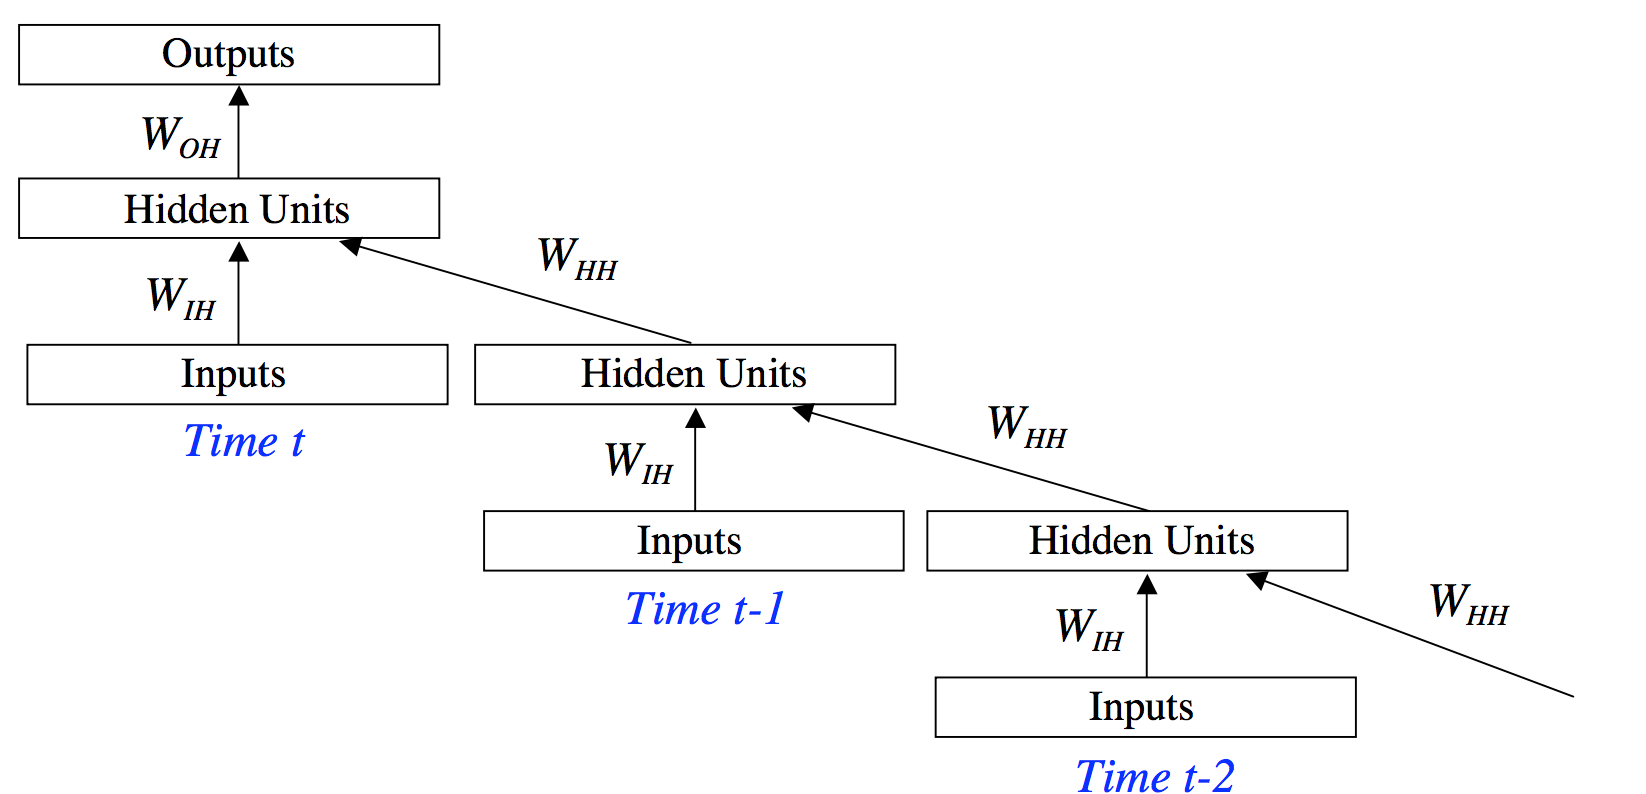
</div>

Используя введенную ранее рекурсивную формулу опишем состояние модели в момент времени $t$:
$$
\begin{split}
h_t &= f_{h} (X_{t}, f_{h} (X_{t-1}, f_{h} (X_{t-2}, ...(X_{2}, f_{h} (X_{1}, h_{0}) ))) &\leftarrow \text{  в общем случае  }
\\
h_t &=\text{tanh}(W_{ih}^{T} \cdot X_{t} + W_{hh}^{T}\cdot \text{tanh}(... (\text{tanh}(W_{ih}^{T} \cdot X_{1} + W_{hh}^{T}\cdot h_{1} +b_{h}) +b_{h}))) &\leftarrow \text{  для модели Элмана  }
\end{split}
$$

# `Backpropagation Through Time`

Итак, мы вроде смогли предложить архитектуру. Осталось понять, как такое учить? Человечество все еще не придумало ничего лучше градиентной оптимизации, поэтому использовать мы будем именно ее. Осталось всего-то понять, как считать градиенты через рекуррентность. Для этого существует специальный алгоритм - Backpropagation Through Time.

Данный алгоритм является основным в обучении RNN. Рассмотрим его работу на примере задачи бинарной классификаци. В процессе будут выведены как общие, так и частные формулы градиентов для задачи many to many:

**Замечание** Все остальные модели являются частными случаями many to many. 
1. One to one. Последовательность длины 1.
2. Many to one. Потерю на всех слоях кроме нужного (обычно - последнего) можно приравнять 0.
3. One to many. Зависит от используемого подхода.

**Общие формулы (параметризованные функции)**

$$
\begin{split}
h_{t} & = \ f_{h}(X_{t}, h_{t-1}, W_{hh}, W_{ih})\\
o_{t} &= f_o (h_{t}, W_{oh})\\
\hat{y}_{t} &= f_y(o_{t})
\end{split}
$$


**Модель Элмана**

$$
\begin{split}
h_{t} & = \text{tanh}(W_{ih}^{T} \cdot X_{t} + W_{hh}^{T}\cdot h_{t-1} +b_{h})\\
o_{t} &= W_{oh}^{T}\cdot h_{t} + b_{y} \\
    \hat{y}_{t} &= \text{softmax}(o_{t})
\end{split}
$$

Для применения backpropagation through time для обучения RNN, сначала определимся с  функцией потерь. Будем использовать кросс энтропию


$$
\begin{split}
L (\hat{y}, y) & = \sum_{t = 1}^{T} L_{t}(\hat{y}_{t}, y_{t}) = - \sum_{t}^{T} y_{t} \log \hat{y}_{t} = -\sum_{t = 1}^{T}y_{t} log \left[softmax(o_{t})^T \right]
\end{split}
$$

Теперь по порядку определим градиент по каждому из обучаемых параметров.


### `Производная по параметрам выхода сети`

<div class="alert alert-danger">
Для тех, кого будут смущать дальнейшие записи с точки зрения размерностей, скажу, что мы будем считать, что у нас векторы по дефолту это строки
</div>

Возьмём производную по параметру $W_{oh}$. Так как он одинаков для любого момента времени, достаточно вычислить производную по потери в каждый момент $t$ и сложить их:

$$
\begin{split}
\frac{\partial L}{\partial W_{oh}} &= \sum_{t}^{T} \frac{\partial L_{t}}{\partial W_{oh}} \\
&= \sum_{t}^{T} \frac{\partial L_{t}}{\partial \hat{y}_{t}} \frac{\partial \hat{y}_{t}}{\partial o_{t}} \frac{\partial o_{t}}{\partial W_{oh}} &\leftarrow \text{  данная формула верна всегда  }\\ 
&=\sum_{t}^{T} h_{t}^T (\hat{y}_{t} - y_{t})  &\leftarrow \text{  для сети Элмана  }
\end{split}
$$

Абсолютно аналогично можно получаем градиент по весу $b_{y}$:

$$
\begin{split}
\frac{\partial L}{\partial b_{o}}  &= \sum_{t}^{T} \frac{\partial L_{t}}{\partial \hat{y}_{t}} \frac{\partial \hat{y}_{t}}{\partial o_{t}} \frac{\partial o_{t}}{\partial b_{o}}&\leftarrow \text{  формула верна всегда  }\\
&=\sum_{t}^{T} (\hat{y}_{t} - y_{t}) &\leftarrow \text{  для сети Элмана  }
\end{split}
$$

**Важно!:** В данном случае вся сложность вычисления градиента заключается в взятии $\dfrac{\partial o_{t}}{\partial W_{oh}}$. 

<div class="alert alert-danger">
    Градиенты конкретно для этих матриц вычисляются очень просто. Даже если вместо простого линейного слоя (как в моделе Элмана) использовать нейронную сеть с несколькими слоями, сложность вычисления данного градиента будет значительно ниже, чем сложность вычисления производной по другим параметрам.  
</div>

### `Производная по параметрам обновления скрытого состояния`

<div class="alert alert-info">
    К счастью, современные системы автоматического дифференцирования могут это все делать сами. Важно только понимать, за счет какой математики мы можем считать такие штуки. А также какие получаются итоговые градиенты, так как это выльется в сложности при обучении RNN. При большом желании этот раздел можно пропустить и посмотреть только на итоговые формулы
</div>

Сначала отметим, что при взятии производной по $W_{hh}$, параметр $W_{ih}$ является константой и можно записать $h_{t+1} = f(h_t,W_{hh}, X_t, W_{ih}) = f(h_t,W_{hh})$

Далее, обозначим $L_{t+1}$ за потерю в момент времени $t+1$, ( в сети Элмана $L_{t+1} = -y_{t+1} log \hat{y}_{t+1}^T$).

Теперь выведем градиент по параметрам $W_{hh}$, в переходе с $t $ на $ t+1$ временной шаг.

$$
\frac{\partial L_{t+1}}{\partial W_{hh}} =  \frac{\partial L_{t+1}}{\partial \hat{y}_{t+1}} \frac{\partial \hat{y}_{t+1}}{\partial h_{t+1}} \frac{\partial h_{t+1}}{\partial W_{hh}}
$$

***Важное напоминание из матана:***

Пусть $x, y$ зависят от $\lambda$, а $z = z(x,y)$. Тогда справедлива формула:
$\cfrac{\partial z}{\partial \lambda} = \cfrac{\partial z}{\partial x}\cfrac{\partial x}{\partial \lambda} + \cfrac{\partial z}{\partial y}\cfrac{\partial y}{\partial \lambda}$

Далее, обозначая x = $1\cdot W_{hh}$, y = $h_{t-1} = g(W_{hh}, h_{t-2})$ получаем из этого правила, что $h_{t} = f(W_{hh},h_{t-1}) = f(x(W_{hh}),y(W_{hh}))$. Откуда
$$ 
\cfrac{\partial h_{t}}{\partial W_{hh}} = \cfrac{\partial h_{t}}{\partial W_{hh}}\cfrac{\partial W_{hh}}{\partial W_{hh}} + \cfrac{\partial h_{t}}{\partial h_{t-1}}\cfrac{\partial h_{t-1}}{\partial W_{hh}} = \cfrac{\partial h_{t}}{\partial W_{hh}} + \cfrac{\partial h_{t}}{\partial h_{t-1}}\cfrac{\partial h_{t-1}}{\partial W_{hh}}
$$

Отметим, что в левой и правой части $\cfrac{\partial h_{t}}{\partial W_{hh}}$ означает разные вещи. Правильно было бы писать

$$ 
\cfrac{\partial h_{\tau}}{\partial W_{hh}} = f'_x(W_{hh}, h_{\tau-1}) + f'_y(W_{hh}, h_{\tau-1}) \cfrac{\partial h_{\tau-1}}{\partial W_{hh}}
$$


Так как данная формула верна для любого $\tau$, то она верна и для $t - 1$:
$$ 
\cfrac{\partial h_{t-1}}{\partial W_{hh}} = \cfrac{\partial h_{t-1}}{\partial W_{hh}} + \cfrac{\partial h_{t-1}}{\partial h_{t-2}}\cfrac{\partial h_{t-2}}{\partial W_{hh}}
$$

Таким образом,

$$
\cfrac{\partial h_{t}}{\partial W_{hh}} = \cfrac{\partial h_{t}}{\partial W_{hh}} + \cfrac{\partial h_{t}}{\partial h_{t-1}}\cfrac{\partial h_{t-1}}{\partial W_{hh}} + \cfrac{\partial h_{t}}{\partial h_{t-1}}\cfrac{\partial h_{t-1}}{\partial h_{t-2}}\cfrac{\partial h_{t-2}}{\partial W_{hh}}
$$


И так эта цепочка продолжается до $t = 1$, так как $h_0 = const $. В итоге имеем выражение:

$$
\frac{\partial L_{t+1}}{\partial W_{hh}} = \sum_{k=1}^{t+1} \frac{\partial L_{t+1}}{\partial \hat{y}_{t+1}} \frac{\partial \hat{y}_{t+1}}{\partial h_{t+1}}  \left( \prod_{j = k} ^{t} \frac{\partial h_{j+1}}{\partial h_{j}} \right) \frac{\partial h_{k}}{\partial W_{hh}}
$$




А теперь заметим, что $\cfrac{\partial h_{t+1}}{\partial h_{k}}$ тоже является цепочкой производных!  А именно, $\cfrac{\partial h_{3}}{\partial h_{1}} = \cfrac{\partial h_{3}}{\partial h_{2}}\cfrac{\partial h_{2}}{\partial h_{1}}$. Также отметим, что так как градиент берётся от вектора по вектору, то результатом является матрица (Якобиан перехода с состояния $h_k$ на $h_t$). 

***Итоговая формула градиента для потери в момент $t$ имеет вид:***

$$
\frac{\partial L_{t+1}}{\partial W_{hh}} = \sum_{k=1}^{t+1} \frac{\partial L_{t+1}}{\partial \hat{y}_{t+1}} \frac{\partial \hat{y}_{t+1}}{\partial h_{t+1}}\frac{\partial h_{t+1}}{\partial h_{k}} \frac{\partial h_{k}}{\partial W_{hh}}
$$

где

$$
\frac{\partial h_{t+1}}{\partial h_k} = \prod^{t}_{j=k} \frac{\partial h_{j+1}}{\partial h_{j}}  = \frac{\partial h_{t+1}}{\partial h_{t}}\frac{\partial h_{t}}{\partial h_{t-1}}...\frac{\partial h_{k+1}}{\partial h_k} 
$$


Складывая градиенты по всем выходам из сети (моментам времени), получим 

***Итоговая формула градиента по параметрам обновления состояния***

$$
\frac{\partial L}{\partial W_{hh}} = \sum_{t}^{T} \sum_{k=1}^{t+1} \frac{\partial L_{t+1}}{\partial \hat{y}_{t+1}} \frac{\partial \hat{y}_{t+1}}{\partial h_{t+1}} \frac{\partial h_{t+1}}{\partial h_{k}}\frac{\partial h_{k}}{\partial W_{hh}}
$$


**Важно:!** Все формулы приведённые в данном разделе верны для общего вида RNN.

### `Производная по параметрам входа сети`

Градиент по $W_{ih}$ нужно вычислять аналогично, рекурсивным образом. 

Сразу приведём итоговую формулу, которая почти ничем не отличается от предыдушей.
$$
\frac{\partial L} {\partial W_{ih}} = \sum_{t}^{T} \sum_{k=1}^{t+1} \frac{\partial L_{t+1}}{\partial \hat{y}_{t+1}} \frac{\partial \hat{y}_{t+1}}{\partial h_{t+1}} \frac{\partial h_{t+1}}{\partial h_{k}} \frac{\partial h_{k}}{\partial W_{ih}} 
$$


## `Vanishing/Exploding Gradients with vanilla RNNs`


Рассмотрим одно из выражений, вычисление которого является необходимым для вычисления градиентов по параметрам.
$$
\frac{\partial h_{t+1}}{\partial h_k} = \prod^{t}_{j=k} \frac{\partial h_{j+1}}{\partial h_{j}} =  \frac{\partial h_{t+1}}{\partial h_{t}}\frac{\partial h_{t}}{\partial h_{t-1}}...\frac{\partial h_{k+1}}{\partial h_k} 
$$

Раскроем одну из производных вида $\dfrac{\partial h_{j+1}}{\partial h_{j}}$, в предположении, что $h_{j+1} = f(h_j,W_{hh}, X_t, W_{ih}) = \phi_{h}(W_{ih}^{T} \cdot X_{j+1} + W_{hh}^{T}\cdot h_{j} +b_{h})$ . Которое выполнено, например, для сети Элмана. Итак :

$$
\dfrac{\partial h_{j+1}}{\partial h_{j}} =  diag \left\{\phi_{h}^{\prime}(W_{ih}^{T} \cdot X_{j+1} + W_{hh}^{T}\cdot h_{j} +b_{h})\right\}W_{hh}
$$

Таким образом, если мы хотим провести BPTT на $t-k$ шагов, то якобиан перехода между состояниями будет иметь вид:

$$
\frac{\partial h_{t+1}}{\partial h_k} =\prod^{t}_{j=k} \frac{\partial h_{j+1}}{\partial h_{j}} = \prod^{t}_{j=k} diag(\phi_{h}^{\prime}(W_{ih}^{T} \cdot X_{j+1} + W_{hh}^{T}\cdot h_{j} +b_{h}))W_{hh}
$$

Из формулы ясно, что всего два фактора влияют на порядок значения градиента - веса и функции активации. Как и в CNN/FCN, в RNN взрыв/
затухание градиента связан с тем, что повторное произведение похожих якобианов ведёт к экспоненциальному росту/убыванию модуля градиента.

Как показано в [этой статье](https://arxiv.org/pdf/1211.5063.pdf), если все собственные значения матрицы $W_{hh}$ больше 1, то градиент 'взрывается', а если менее 1, то 'затухает'. Причём рано или поздно происходит поляризация, т.е. момент когда большинство матриц принимает либо слишком большие, либо слишком малые значения.

Другой факт заключается в том, что большинство функций активаций имеют ограниченные сверху $1.0$ производные. Поэтому их перемножение ведёт к затуханию градиента. 

<div>
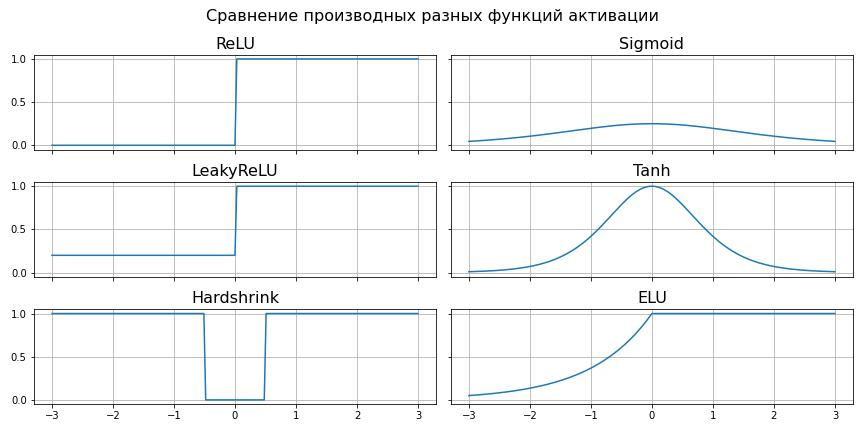
</div>

В итоге это приводит к тому, что более ранние слои не обучаются (получают градиент $\approx 0$) из-за чего не происходит обучение остальных слоёв. 



<div class="alert alert-danger">
Итак,
проблема взрывающихся и затухающих градиентов связана с видом производной $\cfrac{\partial h_{t+1}}{\partial h_{k}}$, которая в зависимости от функции активации и инциализации весов может экспоненциально расти или падать. Эта проблема является ключевой в обучении RNN. В данном ноутбуке это будет явно показано далее на примере последовательности длины 51.

Также отметим, что эта проблема встречалась нам и в FCN, CNN. Однако в случае RNN данная проблема является фундаментальной, так как зависит не только от глубины архитектуры ( как в FCN, CNN ), но и от данных. В частности, в некоторых задачах сети вообще не ограничены по глубине. Например в задаче [eigenworms](http://www.timeseriesclassification.com/description.php?Dataset=EigenWorms) длина ограничена числом 18000
</div>


Было разработано много методов борьбы с данным феноменом. Хотя используются и функции активации с единичной производной (ReLU), инициализации унитарными матрицами и проч., наиболее известным методом является переход к специальной архитектуре LSTM (Long Short-Term Memory).

## `Как бороться с взрывом градиентов?`

В целом часть из методов вы уже могли знать. Поэтому давайте попробуем подумать.


&nbsp;

<details>
  <summary>Нажмите, когда будете готовы увидеть ответ</summary>
    <ol>
      <li>Использование функций активации с единичными производными (ReLU, Hardshrink)</li>
      <li>Gradient clipping - ограничение градиента по норме (можно считать, что таким образом мы уменьшаем дисперисию, а, значит, ускоряем сходимость):
    Если $||\nabla_W||> \theta$, то $\tilde{\nabla}_W = \theta\cfrac{ \nabla_W}{||\nabla_W||}  $</li>
      <img src=" 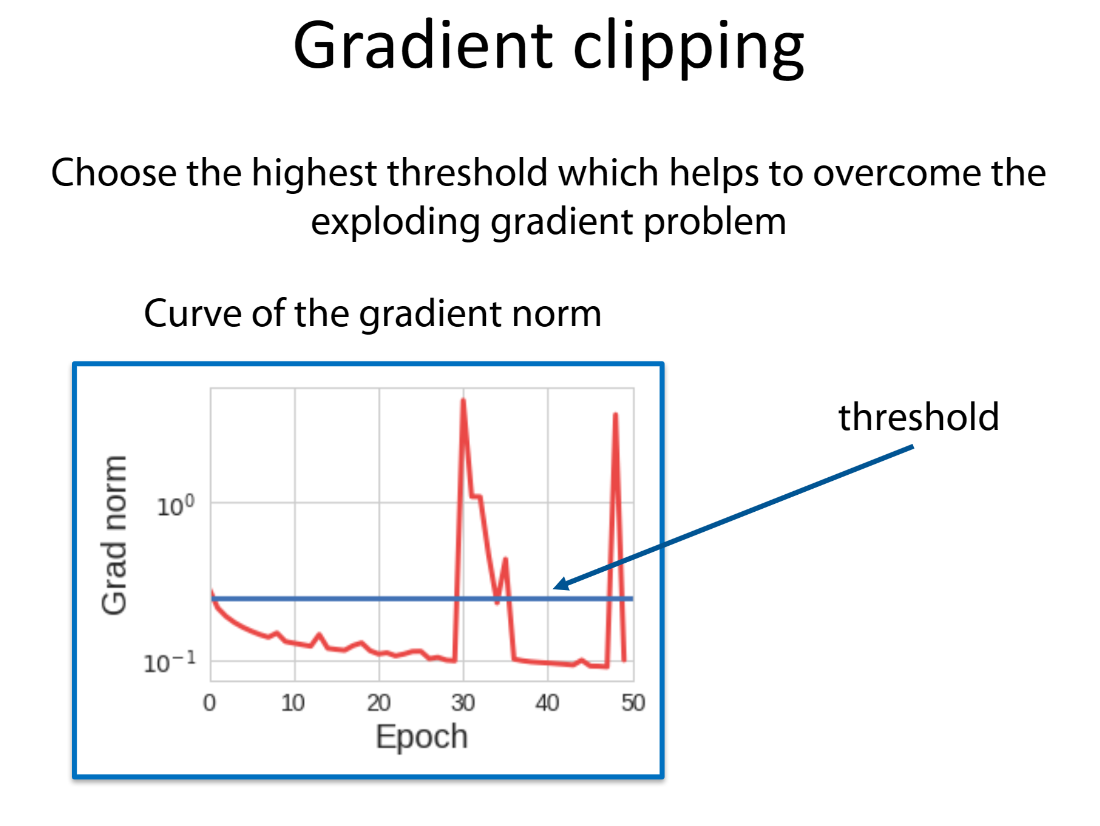" style="height: 400px;"/>
        <li>Ортогональная инициализация (попытка удержания единичной нормы за счёт инициализации).</li>
        <li>Регуляризация. Один из самых известных способов - Dropout в RNN. С ним вы познакомитесь в домашке</li>
        <li><b style="color: green">Gated models - наверное, самый эффективный, простой и популярный способ. Использование сетей специального вида (LSTM, GRU).</b></li>
    </ol> 
</details>

## `Как бороться с затуханием градиентов?`


&nbsp;

<details>
  <summary>Нажмите, когда будете готовы увидеть ответ</summary>
    <ol>
        <li>Оптимизация с помощью методов с инерцией и надежда на то, что мы из-за нее проскочим место, где градиенты тухнут</li>
        <li>Использование функций активации с единичными производными (ReLU, Hardshrink)</li>
        <li>Ортогональная инициализация (попытка удержания единичной нормы за счёт инициализации).</li>
        <li><b style="color: green"> Gated models - наверное, самый эффективный, простой и популярный способ. Использование сетей специального вида (LSTM, GRU).</b> </li>
    </ol>
    Если в случае взрывов градиентов у нас есть универсальный способ борьбы - клиппинг, то для затухания такого нет, и пункт про архитектуру становится еще важнее
</details>

## ` Модель LSTM `

Модель ячейки LSTM ( т.е. внутреннего состояния и формул обновления ) существенно отличается от обычной модели. Раз у вас уже была лекция, то вы сами можете рассказать мне идейные отличия. В качестве подсказки скажу, что LSTM расшифровывается как Long-Short Time Memory.

&nbsp;

<details>
  <summary>Нажмите, когда будете готовы увидеть ответ</summary>
    <ol>
        <li>Вместо одного вектора внутреннего состояния $h_t$ используется cell-state $c_t$ и hidden state $h_t$. Можно сказать, что первый из них отвечает за 'долгую' память, а второй за короткую.</li>
        <li>Вместо простого линейного слоя и активации используется несколько различных весов и активаций, а так же произведения Адамара.</li>
        <li>Ортогональная инициализация (попытка удержания единичной нормы за счёт инициализации).</li>
        <li>На выход подаётся значение $h_t$, поверх него далее можно настроить отдельный слой классификации. А вот $c_t$ в подсчёте ошибки на $t$-ом шаге не учавствует.</b> </li>
    </ol>
</details>


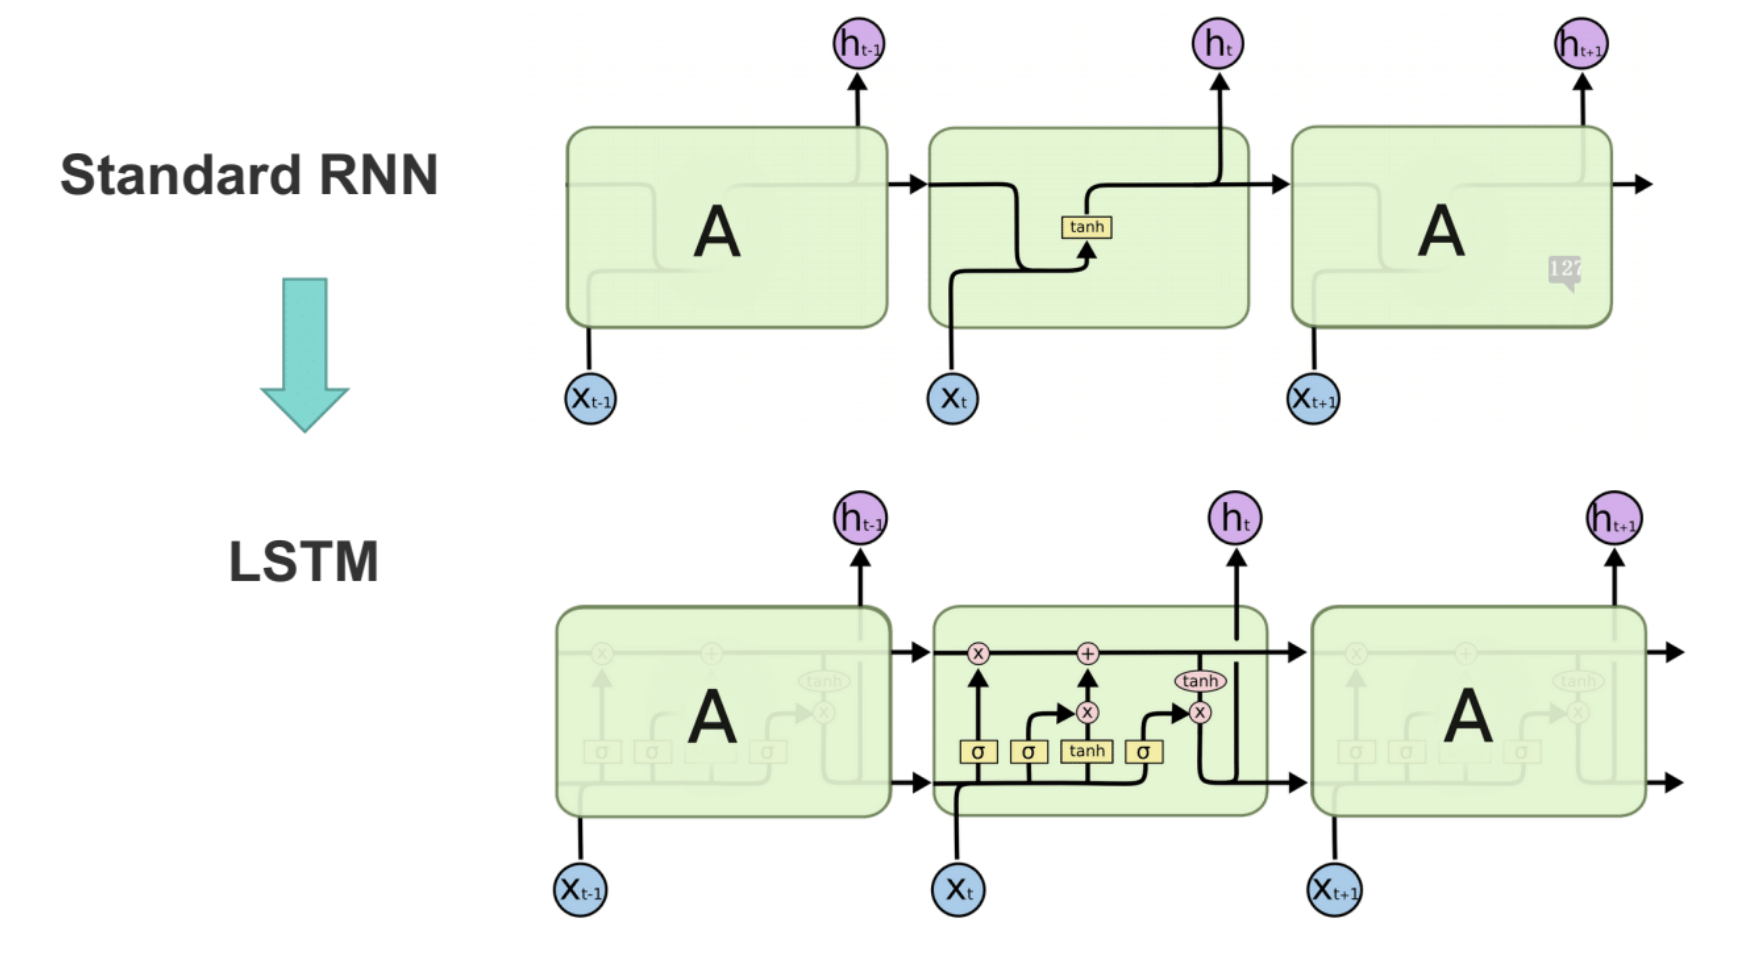
</div>




$$ 
\text{Точные формулы}\\
\begin{align}
\text{forget } f_t &= \text{Sigmoid}(W_{f} x_t + U_{f} h_{t-1} + b_f)  \\
\text{input  } i_t &= \text{Sigmoid}((W_{i} x_t + U_{i} h_{t-1} + b_i) \\
\text{output }o_t &= \text{Sigmoid}(W_{o} x_t + U_{o} h_{t-1} + b_o) \\
\text{candiadate  }\tilde{C}_t &= \text{Tanh}(W_{c} x_t + U_{c} h_{t-1} + b_c) \\
C_t &= f_t \odot C_{t-1} + i_t \odot \tilde{C}_t \\
h_t &= o_t \odot \text{Tanh}(C_t)
\end{align}
$$


### `Разбор смысловой нагрузки гейтов`

Раз у вас были лекции про LSTM, то вам не составит труда вспомнить это :)

***1. Forget gate***

&nbsp;
<details>
  <summary>Нажмите, когда будете готовы увидеть ответ</summary>
Допустим, на вход модели поступает текст. Она должна следить за семантической структурой, а потому когда слова меняются с единственного числа на множественные, то модель должна забыть часть прошлого контекста. Представим, что некоторые координаты $1,...,m$ из представления $C_t$ отвечают за число и пол субъекта части предложения. 

Рассмотрим предложение "Гости съели пироги - постарался наврать Вова". В первой части подлежащее множественного числа, а во второй части единственного.

В тот момент, когда пришло слово 'постарался', мы понимаем, что речь идёт уже о другом субъекте. Поэтому $f_t$ будет примерно равна 0 для координат $C$ отвечающих за пол, число, так как их нужно забыть.
</details>


***2. Candidate gate***

&nbsp;
<details>
  <summary>Нажмите, когда будете готовы увидеть ответ</summary>
Данный gate отвечает за то, какая новая информация будет внесена в длинную память. В прошлом примере для слова 'постарался' он будет содержать информацию о новом поле и числе существительного. Такую же информацию он будет содержать и для остальных слов предложения.

Важное отличие от остальных gate'ов! Функция Tanh используется, чтобы получать значения в диапозоне $[-1,1]$.
</details>


***3. Input (update) gate***

&nbsp;
<details>
  <summary>Нажмите, когда будете готовы увидеть ответ</summary>
Данный gate отвечает за то, будет ли внесена информация из Candidate в $C_t$. Например, на слове 'пироги' нам не нужно обновлять число субъекта, поэтому $i_t \approx 0$. Но на слове 'постарался' необходимо зафиксировать изменения: $i_t \approx 1$.
</details>


***4. Output gate***

&nbsp;
<details>
  <summary>Нажмите, когда будете готовы увидеть ответ</summary>
В отличие от остальных gate'ов, данный не влияет на $C_t$, но меняет $h_t$. Регулирует, что должно остаться в короткой памяти и пойти на выход. Например, если среди координат $1,...,m$  в $C_t$  отвечающих за число текущего субъекта также хранится осреднённая информация о предыдущих субъектах, то данный gate должен её удалить.
</details>

## `Vanishing/Exploding Gradients with LSTMs`

Приведём некое объяснение тому факту, что LSTM не подвержена взрыву и затуханию градиента. Для этого покажем, что градиент cell-state не затухает.


Для этого приведём формулу $\frac{\partial C_{t}}{\partial C_{t-1}}$. Причём $C_{t}$ - зависит от $f_{t}$ (forget gate), $i_{t}$ (input gate), $\widetilde{C_{t}}$ (candidate input - он же cell gate), все из которых зависят от 
$C_{t-1}$ через $h_{t-1}$:

$$
\frac{\partial C_{t}}{\partial C_{t-1}} = \frac{\partial C_{t}}{\partial f_{t}} \frac{\partial f_{t}}{\partial h_{t-1}} \frac{\partial h_{t-1}}{\partial C_{t-1}} + \frac{\partial C_{t}}{\partial i_{t}} \frac{\partial i_{t}}{\partial h_{t-1}} \frac{\partial h_{t-1}}{\partial C_{t-1}} + \frac{\partial C_{t}}{\partial \widetilde{C}_{t}} \frac{\partial \widetilde{C}_{t}}{\partial h_{t-1}} \frac{\partial h_{t-1}}{\partial C_{t-1}} + \frac{\partial C_{t}}{\partial C_{t-1}}
$$

Подставляя значения:

$$
\begin{split}
\frac{\partial C_t}{\partial C_{t-1}} &= C_{t-1}\sigma^{\prime}(\cdot)U_{f}*o_{t-1}tanh^{\prime}(C_{t-1}) \\
&+ \widetilde{C}_t\sigma^{\prime}(\cdot)U_{i}*o_{t-1}tanh^{\prime}(C_{t-1}) \\
&+ i_t\tanh^{\prime}(\cdot)U_c*o_{t-1}tanh^{\prime}(C_{t-1}) \\
&+ \textbf{f_t}
\end{split}
$$

Ключевое отличие в данном случае - наличие $f_t$. Добавление данной поправки всегда может приблизить $\frac{\partial C_t}{\partial C_{t-1}}$ к единице.

## ` Модель GRU `

<img src='http://vbystricky.ru/images/2021-05/gru.svg'>


$$ 
\text{Точные формулы}\\
\begin{align}
\text{reset } r_t &= \text{Sigmoid}(W_{ir} x_t + W_{hr} h_{t-1} + b_r)  \\
\text{update  } z_t &= \text{Sigmoid}((W_{iz} x_t + W_{hz} h_{t-1} + b_z) \\
\text{new } n_t &= \text{tanh}(W_{in} x_t + b_{in} + r_t \odot (W_{hn} h_{t-1} + b_{hn})) \\
h_t &= (1 - z_t) \odot n_t + z_t \odot h_{t-1}
\end{align}
$$


В отличие от LSTM, GRU состоит только из трех гейтов и не поддерживает глобальный контекст, всю необходимую информацию мы содержим в скрытом состоянии. Сыграем в угадайку. Попробуйте догадаться, что делает каждый из гейтов, исходя из формул и знаний LSTM.

&nbsp;
<details>
  <summary>Нажмите, когда будете готовы увидеть ответ</summary>
  <ol>
    <li>Update Gate (z): Он определяет, в каком виде прошлую информацию надо передать далее. По сути является аналогом output gate в LSTM</li>
    <li>Reset Gate (r): определяет, какую часть прошлых знаний следует забыть. По сути действует аналогично комбинации input gate и forget gate в LSTM.</li>
    <li>New Gate (n): часто не выделяют, как отдельный гейт, а объединяют с Update Gate, что следует из названия. Здесь происходит добавление новой информации к старой и определение того, что мы хотим передать далее с учетом этих знаний.</li>
   </ol>
</details>  


GRU очень похожа на LSTM, но использует меньше параметров из-за чего ее обучение дешевле. Эти две архитектуры являются самыми популярными среди RNN



## `Теоретические результаты про RNN`:

Если про полносвязные сети известно, что они способны аппроксимировать любую функцию, то про RNN известно, что они аппроксимируют поведение любой динамической системы. Другими словами, реализует любую вычислимую функцию. Т.е. более или равномощно машине Тьюринга. [Any algebraically computable function can be expressed as a recurrent neural network](http://users.ics.aalto.fi/tho/stes/step96/hyotyniemi1/)

[В реальности это не совсем так](https://proceedings.neurips.cc/paper/2021/file/ef452c63f81d0105dd4486f775adec81-Paper.pdf). Если коротко, то в предыдущих статьях показано, что этот теоретический результат получается при вещественной арифметике. Но в реальности у нас точность ограничена, поэтому потребовалось модифицировать тот результат. Авторы показали, что в случае ограниченной точности и растущей памяти RNN могут моделировать универсальную Машину Тьюринга


# `2. Обработка последовательностей в pytorch`

Теперь посмотрим на практике то, что обсуждалось ранее. А именно поведение градиентов и методов борьбы с их плохим поведением

#### Задача: даны x, y, z координаты частей рук человека.

$ X = (\mathbb{x_1}, \mathbb{x_1}, \dots, \mathbb{x_L})\text{ - последовательность фиксированной длины из многомерных векторов,} \\ \mathbb{x} = (x_{1,1}, x_{1,2}, x_{1,3}, \dots, x_{8,1}, x_{8,2}, x_{8,3}) \in \mathbb{R}^{24} \text{- проекция последовательности в некоторый момент времени}$

#### Классифицировать жесты, выполняемые человеком. [(Датасет NATOPS)](http://www.timeseriesclassification.com/description.php?Dataset=NATOPS)


Данная задача - классификация временного ряда. 

Тип 'many to one' (но можно успешно решать свёртками / полносвязными сетями как one to one, так как длина ряда фиксирована).

В данной простой задаче длины рядов как раз совпадают для всех объектов и равны 51.

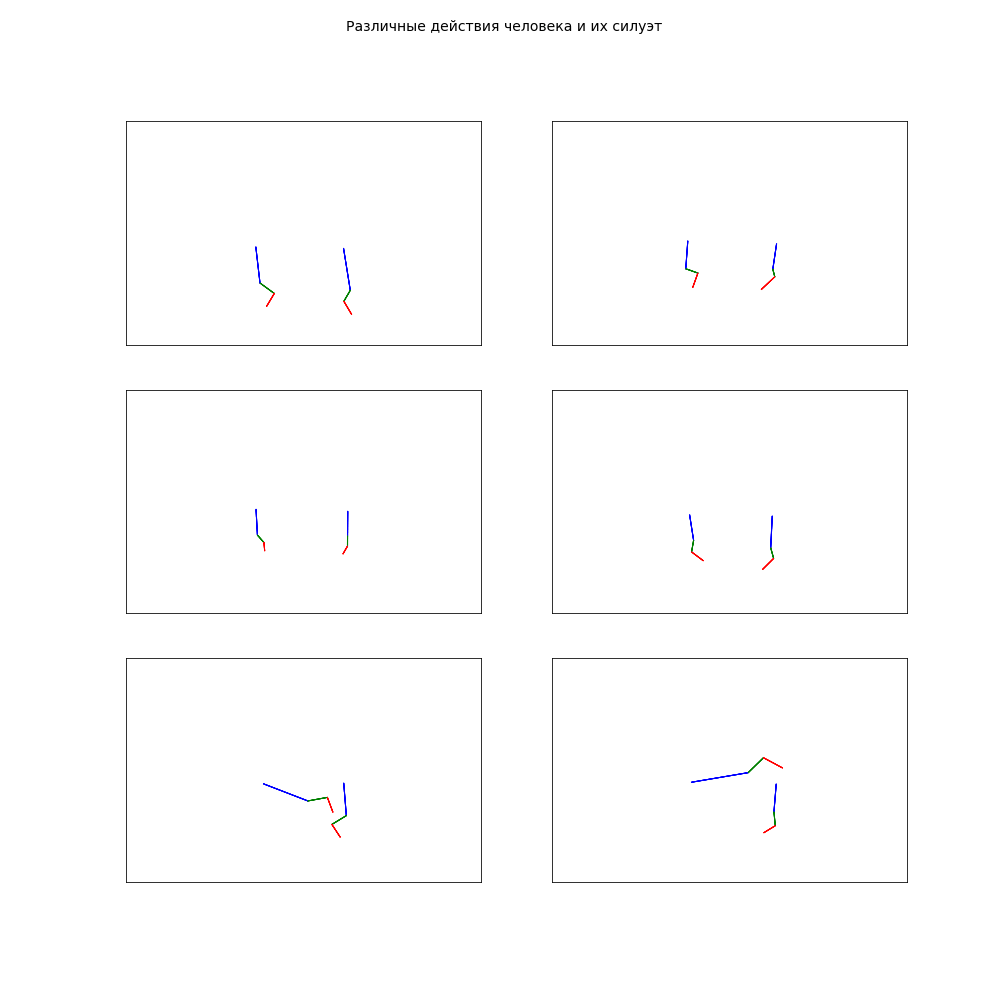

In [1]:
from collections import defaultdict
import pandas as pd
import numpy as np
import scipy

import os

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
from torchvision import transforms
from torch.optim.lr_scheduler import StepLR

import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns

import sktime
from sktime.datasets import load_from_tsfile_to_dataframe
from torch.utils.data import Dataset, DataLoader

from tqdm.notebook import tqdm
import random

In [2]:
%config InlineBackend.figure_formats = ['svg']

In [3]:
def set_global_seed(seed: int) -> None:
    """
    Set global seed for reproducibility.
    """

    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    random.seed(seed)
    np.random.seed(seed)
    
set_global_seed(42)

In [4]:
def seed_worker(worker_id):
    worker_seed = torch.initial_seed() % 2**32
    numpy.random.seed(worker_seed)
    random.seed(worker_seed)

g = torch.Generator()
g.manual_seed(42)

Для работы с данными в pytorch следует писать свой Dataset

В данном случае исходные данные имеют тип sktime. Используя соответствующую библиотеку их можно отразить в pandas.DataFrame. Оттуда их нужно перевести в numpy или сразу torch.

Особенность обработки - метки могут быть строками, поэтому для перевода их в числа нужно хранить словарь, который нужно 'обучить' на основной части выборки и использовать в тестовой.

## Например

In [5]:
class Sktime_Series_Сlassification_Dataset(Dataset):
    def __init__(self, data_path, label_dict=None, transforms=None, pad_len=None):
        """
        :data_path: Строка к файлу с данными в формате sktime
        :label_dict: Словарь преобразования исходных меток (строк) в индексы
        :transforms: Возможные аугментации данных
        :pad_len - length of padding to apply when the length is not fixed
        """
        super().__init__()
        
        # Данные приходят размера N x M x L
        _x, _y = load_from_tsfile_to_dataframe(data_path)
        
        self.M = _x.shape[1]
        self.series_len =  _x[_x.columns[0]].iloc[0].shape[0]
        
        # Если нужно привести все ряды к одинаковой длине - добиваем до заданного размера нулями
        if pad_len is not None:
            self.X = [[np.hstack((np.array(_x.iloc[object_ind][column]), np.zeros(pad_len -_x.iloc[object_ind][column].shape[0])))
                    for column in _x.columns] for object_ind in range(_x.shape[0])]
        else:
            self.X = [[np.array(_x.iloc[object_ind][column]) for column in _x.columns] for object_ind in range(_x.shape[0])]  
        self.X = np.array(self.X)
        
        # Создаём словарь для обработки классов
        if label_dict is None:
            self.label_dict = {}
            for i, word in enumerate(np.unique(_y)):
                self.label_dict[word] = i
            print('Размерность обучающей выборки {0} x {1} x {2} (Количество объектов x размерность x длина)'.format(*self.X.shape))
            print('Всего {0} классов'.format(len(self.label_dict.keys())))
        else:
            # В тестовый датасет передадим готовый словарь
            self.label_dict = label_dict
            
        # Кодируем вектор таргетов как (-1,) 
        self.y = np.zeros((_y.shape[0]), int)
        for i, word in enumerate(_y):
            self.y[i] = self.label_dict[word] 

        self.transforms = transforms
    
    def __getitem__(self, idx):
        """
        :idx: индекс объекта из выборки
        """

        object_ = {'series':self.X[idx], 'target':self.y[idx]}
        
        # Если есть преобразования - применяем
        if self.transforms is not None:
            for transform in self.transforms:
                object_ = transform(object_)
        
        return object_ 
    
    def __len__(self):
        """
        :return int: number of objects in dataset 
        """
        return self.X.shape[0]

Для применения трансформаций выборки необходимо реализовать специальный декоратор.

In [6]:
def basic_series_transform(transform):
    """
    Применяет преобразование transform к временному ряду.
    Метку при этом не трогает.
    """
    def wrapper(object, *args, **kwargs):
        object['series'] = transform(object['series'], *args, **kwargs)
        return object
    return wrapper

class Jittering(object):
    """
    Добавляет нормальный шум в ряд.
    """
    def __init__(self, sigma):
        self.sigma = sigma

    def __call__(self, object):
        Noise = np.random.normal(loc=0, scale=self.sigma, size=object.shape)
        return object + Noise

<div class="alert alert-danger">

Нами выбрана и зафиксирована концепция 'Batch first'. Т.е. классы реализованы таким образом, что в сеть передаваться будет 'объект' размера $ N \times L \times M$.

В д/з будет другой вариант, в котором 'объект' будет размера $ L \times N \times M$.

При обработке временных последовательностей свёртками также популярно предстваление $ N \times M \times L$.
</div>

<div class="alert alert-danger">

Если ваша модель рекуррентной сети работает ( не выдаёт ошибку ), но не обучается ( качество скачет около минимума ) - вполне возможно, что вы передали данные неправильного вида.

Например в сеть, которая принимает батчи размера $ N \times L \times M$ передали данные вида $ L \times N \times M$.
</div>

<div class="alert alert-danger">

В данном, упрощённом случае длина $L$ одинакова для всех батчей. Более общий случай будет разобран на следующем занятии.
</div>


In [7]:
# Считываем всю информацию в заданные классы

train_path = "./NATOPS/NATOPS_TRAIN.ts"
test_path = "./NATOPS/NATOPS_TEST.ts"

transforms =  [basic_series_transform(Jittering(0.1)), basic_series_transform(torch.Tensor)]

train_dataset = Sktime_Series_Сlassification_Dataset(train_path, transforms=transforms)
test_dataset = Sktime_Series_Сlassification_Dataset(test_path, train_dataset.label_dict)

test_loader = DataLoader(test_dataset, batch_size=10, shuffle=True, worker_init_fn=seed_worker, generator=g)
train_loader = DataLoader(train_dataset, batch_size=10, shuffle=True, worker_init_fn=seed_worker, generator=g)

Размерность обучающей выборки 180 x 24 x 51 (Количество объектов x размерность x длина)
Всего 6 классов


In [8]:
# Просто функции обучения модели
# Единственное отличие от стандартной парадигмы - 
# при итерации по батчу не приходят пары (data, target),
# а словарь с соответствубщими полями

def evaluate(model, device, data_loader):
    """
    Возвращает качество и лосс модели на выборке
    """
    model.eval()
    loss = 0
    correct = 0
    length = 0
    
    with torch.no_grad():
        for batch_idx, batch in enumerate(data_loader):
            # Считываем данные из батча
            data, target = batch['series'].float().to(device), batch['target'].long().to(device)
            output = model(data)
            
            # Обновляем качество
            loss += F.nll_loss(output, target).item() 
            pred = output.argmax(dim=1) 
            correct += (pred == target).sum().item()
            length += batch['target'].shape[0]

    return loss / length, correct / length

def train(model, device, train_loader, test_loader, n_epoch, optimizer, scheduler, 
          max_norm=None, track_gradient=False):
    """
    Обучение и оценивание качества на тесте одновременно
    
    max_norm - параметр gradient clipping. Если None, то не метод не используется.
    track_gradient - Если true, то оцениваем градиент на каждом батче.
    """
    train_history, test_history = {'loss':[], 'acc':[]}, {'loss':[], 'acc':[]}
    
    if track_gradient:
        grad_history = np.zeros((n_epoch, len(list(model.parameters()))))
    
    for epoch in tqdm(range(1, n_epoch + 1)):
        n_objects = 0
        model.train()
        for batch_idx, batch in enumerate(train_loader):
            # Считываем данные из батча
            data, target = batch['series'].float().to(device), batch['target'].long().to(device)
            
            # Делаем шаг по батчу
            optimizer.zero_grad()
            output = model(data)
            loss = F.nll_loss(output, target)
            loss.backward()
            
            # Gradient clipping
            if max_norm is not None:
                torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=max_norm)
                
            # Если нужно - запоминаем норму градиента (отдельно по каждому параметру)
            if track_gradient:
                n_objects +=  data.shape[0]
                for i, p in enumerate(model.parameters()):
                    param_norm = p.grad.data.detach().norm(2)
                    grad_history[epoch-1][i] += param_norm.item() ** 2

            optimizer.step()
            scheduler.step()
            
        # Добавляем информацию в наш логгер
        loss, acc = evaluate(model, device, train_loader)
        train_history['loss'].append(loss), train_history['acc'].append(acc)
        loss, acc = evaluate(model, device, test_loader)
        test_history['loss'].append(loss), test_history['acc'].append(acc)
        
        if track_gradient:
            for i, p in enumerate(model.parameters()):
                grad_history[epoch-1][i] = (grad_history[epoch-1][i] / n_objects) ** 0.5
       
    
    if track_gradient:
        return train_history, test_history, grad_history
    return train_history, test_history

## `Построение рекуррентных моделей в pytorch`


In [9]:
class My_LSTM_Layer(nn.Module):
    """
    Класс - работа RNN с произвольной LSTM-ячейкой
    Единственное требование от этой ячейки - вход и выход как у LSTM
    
    Формат входа как в Batch first LSTM в pytorch - (N, L, M)
    """
    def __init__(self, input_size, hidden_size, rnn_cell, batch_first=False):
        super().__init__()

        self.input_size = input_size
        self.hidden_size = hidden_size
        self.batch_first = batch_first
        
        # Класс реализующий ячейку LSTM
        self.rnn_cell = rnn_cell(self.input_size, self.hidden_size)
        
    def forward(self, X, state=None):
        """
        При прямом проходе необходимо получить скрытые состояния h_t
        для каждого момента времени. Это нужно, например для задач типа many to many
        """
        #  X размера N x L x M
        batch_size = X.shape[0]
        
        
        if state is None:
            # Очень важно! По умолчанию тензор будет на CPU и произойдёт ошибка.
            h_t = X.new_zeros((batch_size, self.hidden_size))
            c_t = X.new_zeros((batch_size, self.hidden_size))
        else:
            h_t, c_t = state

        output = []
        current_len = X.shape[1]
        if not self.batch_first:
            current_len = X.shape[0]
        for t in range(X.shape[1]): 
            h_prev = h_t
            if self.batch_first:
                h_t, c_t = self.rnn_cell(X[:,t,:], (h_t, c_t))
            else:
                h_t, c_t = self.rnn_cell(X[t,:,:], (h_t, c_t))
            # Сохраняем новый выход сети
            output.append(h_t)
        
        return torch.stack(output, dim=1), (h_t, c_t)

In [10]:
class Simple_RNN_Classifier(nn.Module):
    """
    Класс классификации с использованием произвольной RNN
    """
    def __init__(self, input_size, hidden_size, num_class, rnn, 
                 activation=F.relu,  dropout_p=0.5):
        super().__init__()
        
        # 1. Тут могла быть ваша предобработка данных
        
        # Но в простой модели её нет
        
        # 2. Тут рекуррентная часть модели
        # Поступает уже инициализированная рекуррентная сеть
        self.rnn = rnn 
        
        # 3. Тут классификатор
        # Классификатор - два полносвязных слоя с dropout
        self.classifier = nn.Sequential(
            nn.BatchNorm1d(hidden_size),
            nn.Linear(hidden_size, 40),
            nn.Dropout(dropout_p / 2.0), 
            activation, nn.Linear(40, num_class),
            nn.Dropout(dropout_p)
        )

    def forward(self, input):
        # Наш ряд из Dataloader имеет представление (N, M, T)
        # Размер входа в LSTM (N, T, M) -> нужна трансформация
        input = input.swapaxes(1, 2)
        
        # Проход по LSTM
        try:
            output, hidden = self.rnn(input)
        except Exception:
            output = self.rnn(input)
        # Возвращается h_t для всех моментов t = 1, 2,..., T
        # Размерность output (N, T, hidden)
        
        # Получаем h_T
        output = output[:, -1, :]
        
        # Проводим классификацию
        output = self.classifier(output)
        output = F.log_softmax(output, dim=1)
        return output
    
device = torch.device('cuda:0') if torch.cuda.is_available() else torch.device('cpu')
device

device(type='cuda', index=0)

# `3. Сравнение различных подходов в RNN`

В pytorch доступно всего 3 модели RNN:
1. Стандартная RNN (Элмана)
2. LSTM
3. GRU

Посмотрим как обучаются различные модели на нашей задаче.  
А именно, рассмотрим графики качества, функции потерь и средней по выборке нормы градиента
$\dfrac{\partial L_{t+1}}{\partial W_{hh}}, \dfrac{\partial L_{t+1}}{\partial W_{ih}}$. 

Определим среднюю норму градиента по выборке для нашей many-to-one задачи:

Пусть выборка разбита на $k$ одинаковых по размеру батчей $(\hat{X}_1, ..., \hat{X}_k)$. Тогда средняя норма градиента по параметру $\omega$ равняется

$$
\sqrt{\frac{1}{k}\sum_{n=1}^k \left\lVert\frac{\partial L}{\partial W_{hh}}\right\rVert_n^2}
$$

Здесь $\frac{\partial L}{\partial W_{hh}}_n$ - оценка градиента по n-ому батчу.

In [11]:
def get_exps(model, optimizer, scheduler, title, num_epoch=200, max_norm=None):
    # Проводим обучение и строим графики loss, acccuracy
    train_history, test_history, grad_history = train(model, device, train_loader, test_loader, 
                    num_epoch, optimizer, scheduler, max_norm, track_gradient=True)
    plt.subplots(1, 2,figsize=(14,5))
    plt.suptitle(title)
    plt.subplot(1, 2, 1)
    plt.plot(train_history['loss'])
    plt.plot(test_history['loss'])
    plt.xlabel('Эпоха')
    plt.ylabel('Loss')
    plt.legend(['Train', 'Test'])
    plt.grid()
    
    plt.subplot(1, 2, 2)
    plt.plot(train_history['acc'][:])
    plt.plot(test_history['acc'][:])
    plt.xlabel('Эпоха')
    plt.ylabel('Accuracy')
    plt.legend(['Train', 'Test'])
    plt.grid()
    plt.show()
    return train_history, test_history, grad_history

### `Handmade LSTM`

В модели 50400 + 4486 параметров


  0%|          | 0/200 [00:00<?, ?it/s]

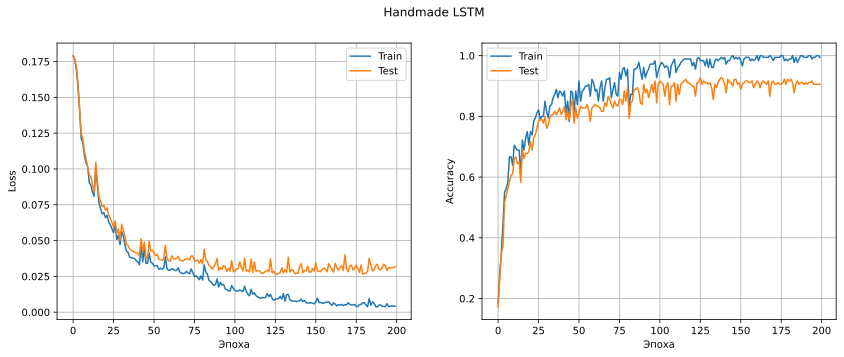

In [12]:
input_size = 24
hidden_size = 100

lstm = My_LSTM_Layer(24, 100, nn.LSTMCell, batch_first=True)
model = Simple_RNN_Classifier(24, 100, 6, lstm, nn.ReLU()).to(device).float()
x, y = sum(p.numel() for p in lstm.parameters()), sum(p.numel() for p in model.parameters())
print(f'В модели {x} + {y - x} параметров')

optimizer = optim.Adam(model.parameters(), lr=5e-4)
scheduler = StepLR(optimizer, step_size=100, gamma=0.9)

_, _, grad_history_HM_LSTM = get_exps(model, optimizer, scheduler, 'Handmade LSTM', 200)

In [13]:
# Посмотрим на то, какие параметры есть в модели
for i, p in enumerate(model.parameters()):
    print(f'Параметр {i}, размер {p.shape}')

Параметр 0, размер torch.Size([400, 24])
Параметр 1, размер torch.Size([400, 100])
Параметр 2, размер torch.Size([400])
Параметр 3, размер torch.Size([400])
Параметр 4, размер torch.Size([100])
Параметр 5, размер torch.Size([100])
Параметр 6, размер torch.Size([40, 100])
Параметр 7, размер torch.Size([40])
Параметр 8, размер torch.Size([6, 40])
Параметр 9, размер torch.Size([6])


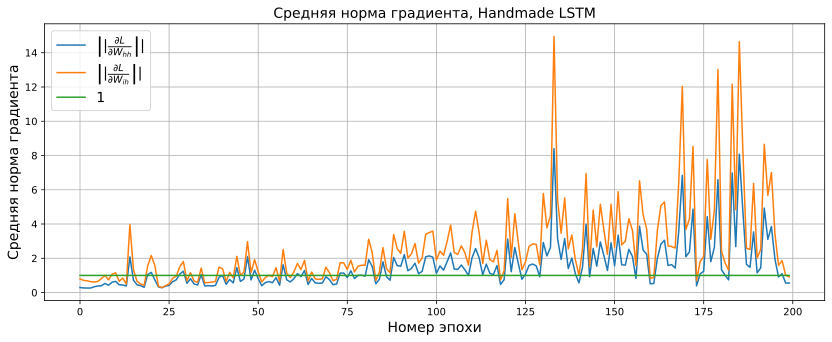

In [14]:
def plot_grads (grad, name):
    plt.figure(figsize=(14, 5))
    plt.title(r'Средняя норма градиента, ' + name, fontsize=14)
    plt.xlabel('Номер эпохи', fontsize=14)
    plt.ylabel('Средняя норма градиента', fontsize=14)
    plt.plot(grad[:, 1])
    plt.plot(grad[:, 0])
    plt.plot(np.ones(200))
    
    plt.legend([r'$\left||\frac{\partial L}{\partial W_{hh}}\right||$', 
                r'$\left||\frac{\partial L}{\partial W_{ih}}\right||$', r'$1$'], fontsize=14)
    plt.grid()
    plt.show()
plot_grads(grad_history_HM_LSTM, 'Handmade LSTM')

### `LSTM`

В модели 50400 + 4486 параметров


  0%|          | 0/200 [00:00<?, ?it/s]

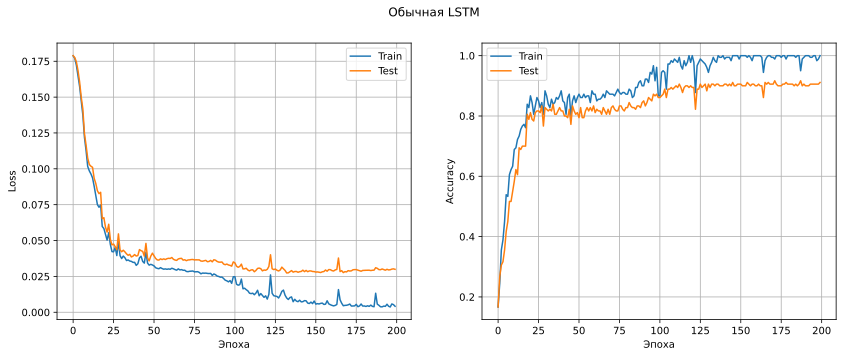

In [15]:
input_size = 24
hidden_size = 100

lstm = nn.LSTM(24, 100, batch_first=True)
model = Simple_RNN_Classifier(24, 100, 6, lstm, nn.ReLU()).to(device).float()
x, y = sum(p.numel() for p in lstm.parameters()), sum(p.numel() for p in model.parameters())
print(f'В модели {x} + {y - x} параметров')

optimizer = optim.Adam(model.parameters(), lr=5e-4)
scheduler = StepLR(optimizer, step_size=100, gamma=0.9)

_, _, grad_history_LSTM = get_exps(model, optimizer, scheduler, 'Обычная LSTM', 200)

In [16]:
# Посмотрим на то, какие параметры есть в модели
for i, p in enumerate(model.parameters()):
    print(f'Параметр {i}, размер {p.shape}')

Параметр 0, размер torch.Size([400, 24])
Параметр 1, размер torch.Size([400, 100])
Параметр 2, размер torch.Size([400])
Параметр 3, размер torch.Size([400])
Параметр 4, размер torch.Size([100])
Параметр 5, размер torch.Size([100])
Параметр 6, размер torch.Size([40, 100])
Параметр 7, размер torch.Size([40])
Параметр 8, размер torch.Size([6, 40])
Параметр 9, размер torch.Size([6])


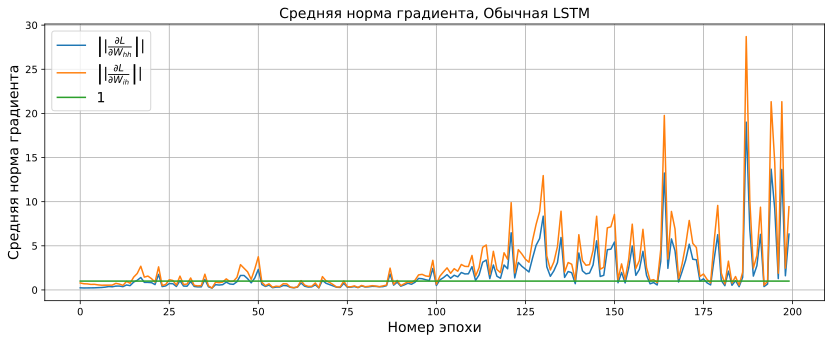

In [17]:
plot_grads(grad_history_LSTM,  'Обычная LSTM')

### `GRU`

В модели 37800 + 4486 параметров


  0%|          | 0/200 [00:00<?, ?it/s]

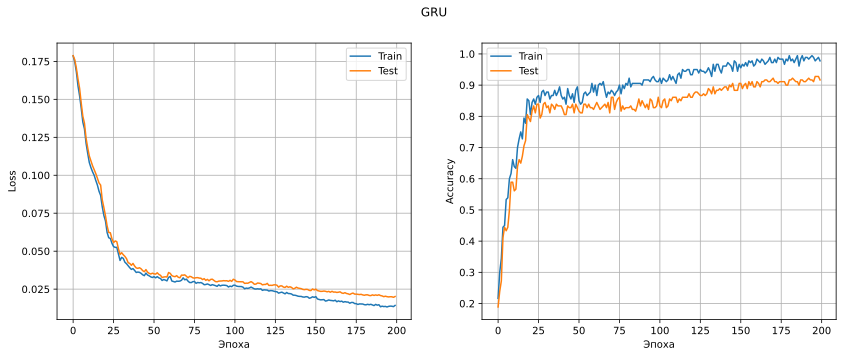

In [18]:
input_size = 24
hidden_size = 100

lstm = nn.GRU(24, 100, batch_first=True)
model = Simple_RNN_Classifier(24, 100, 6, lstm, nn.ReLU()).to(device).float()
x, y = sum(p.numel() for p in lstm.parameters()), sum(p.numel() for p in model.parameters())
print(f'В модели {x} + {y - x} параметров')

optimizer = optim.Adam(model.parameters(), lr=5e-4)
scheduler = StepLR(optimizer, step_size=100, gamma=0.9)

_, _, grad_history_GRU = get_exps(model, optimizer, scheduler, 'GRU', 200)

In [19]:
# Посмотрим на то, какие параметры есть в модели
for i, p in enumerate(model.parameters()):
    print(f'Параметр {i}, размер {p.shape}')

Параметр 0, размер torch.Size([300, 24])
Параметр 1, размер torch.Size([300, 100])
Параметр 2, размер torch.Size([300])
Параметр 3, размер torch.Size([300])
Параметр 4, размер torch.Size([100])
Параметр 5, размер torch.Size([100])
Параметр 6, размер torch.Size([40, 100])
Параметр 7, размер torch.Size([40])
Параметр 8, размер torch.Size([6, 40])
Параметр 9, размер torch.Size([6])


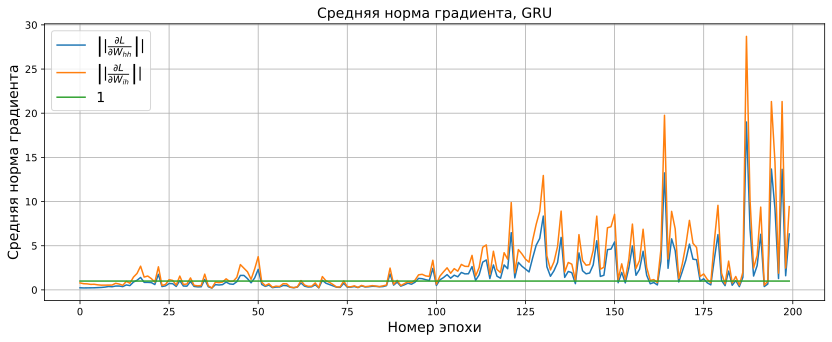

In [20]:
plot_grads(grad_history_LSTM,  'GRU')

### `RNN Элмана`

Попытаемся обучить RNN с размерностью скрытого предстваления 230. В этом случае модель имеет примерно то же число параметров, что и LSTM с скрытой размерностью 100.

В модели 58880 + 9946 параметров


  0%|          | 0/200 [00:00<?, ?it/s]

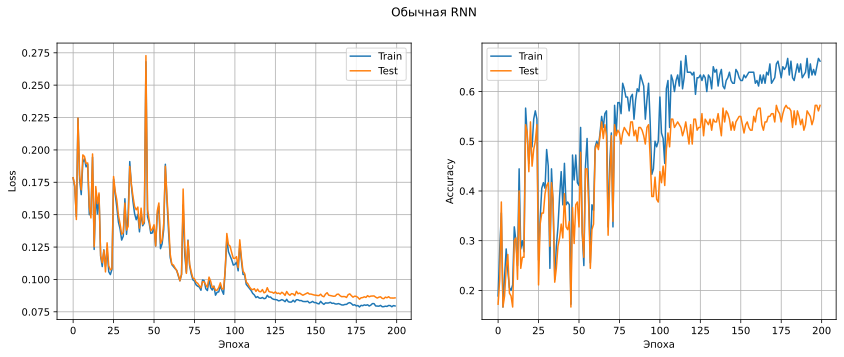

In [21]:
rnn = nn.RNN(24, 230, batch_first=True)
model = Simple_RNN_Classifier(24, 230, 6, rnn, nn.ReLU()).to(device).float()

x, y = sum(p.numel() for p in rnn.parameters()), sum(p.numel() for p in model.parameters())
print(f'В модели {x} + {y - x} параметров')

optimizer = optim.Adam(model.parameters(), lr=5e-4)
scheduler = StepLR(optimizer, step_size=100, gamma=0.9)

_, _, grad_history_RNN = get_exps(model, optimizer, scheduler, 'Обычная RNN', num_epoch=200)

In [22]:
# Посмотрим на то, какие параметры есть в модели
for i, p in enumerate(model.parameters()):
    print(f'Параметр {i}, размер {p.shape}')

Параметр 0, размер torch.Size([230, 24])
Параметр 1, размер torch.Size([230, 230])
Параметр 2, размер torch.Size([230])
Параметр 3, размер torch.Size([230])
Параметр 4, размер torch.Size([230])
Параметр 5, размер torch.Size([230])
Параметр 6, размер torch.Size([40, 230])
Параметр 7, размер torch.Size([40])
Параметр 8, размер torch.Size([6, 40])
Параметр 9, размер torch.Size([6])


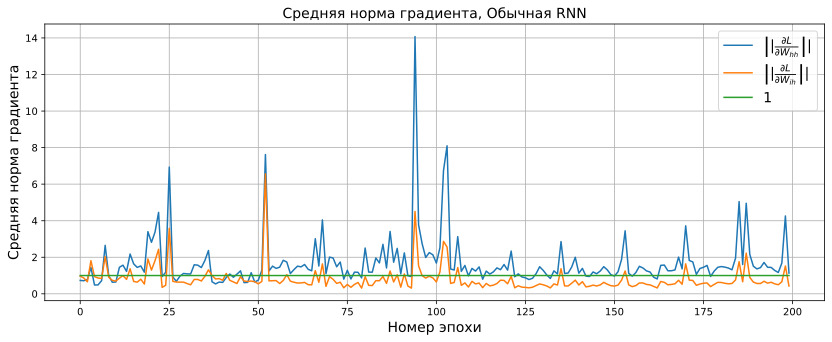

In [23]:
plot_grads(grad_history_RNN,  'Обычная RNN')

### `Облегчённая RNN`

Просто уменьшим размерность скрытого слоя

В модели 8480 + 3646 параметров


  0%|          | 0/200 [00:00<?, ?it/s]

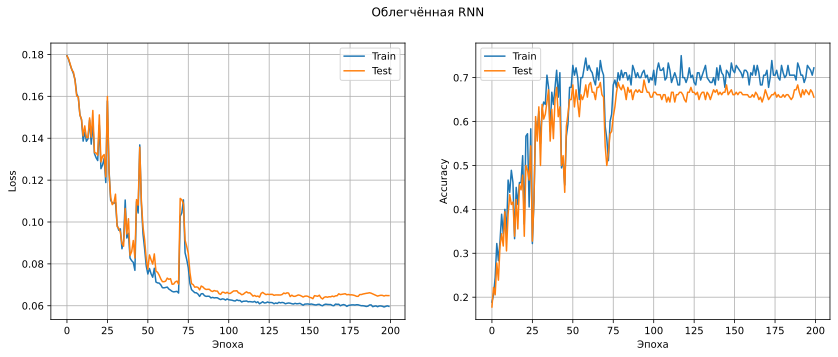

In [24]:
rnn = nn.RNN(24, 80, batch_first=True)
model = Simple_RNN_Classifier(24, 80, 6, rnn, nn.ReLU()).to(device).float()

x, y = sum(p.numel() for p in rnn.parameters()), sum(p.numel() for p in model.parameters())
print(f'В модели {x} + {y - x} параметров')

optimizer = optim.Adam(model.parameters(), lr=5e-4)
scheduler = StepLR(optimizer, step_size=100, gamma=0.9)

_, _, grad_history_RNN = get_exps(model, optimizer, scheduler, 'Облегчённая RNN', num_epoch=200)

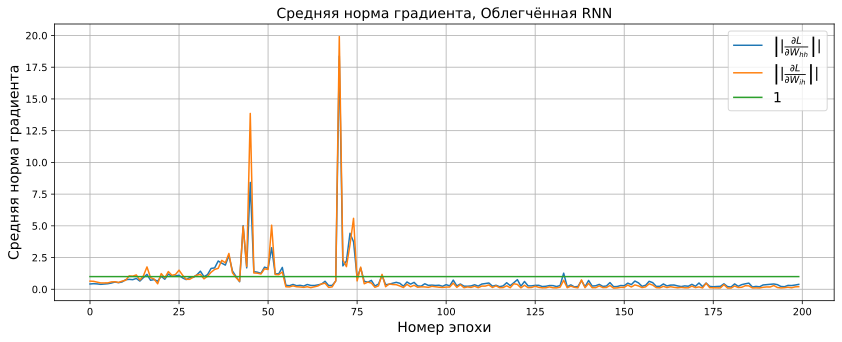

In [25]:
plot_grads(grad_history_RNN,  'Облегчённая RNN')

### `Gradient clipping`

В pytorch он применяется по батчам. Задаём коэф. $\theta$, и если $\left\lVert\dfrac{\partial L}{\partial W_{ih}}\right\rVert > \theta$, то он нормируется: $\dfrac{\partial L}{\partial W_{ih}} = \dfrac{\partial L}{\partial W_{ih}} \dfrac{\theta}{\left\lVert\frac{\partial L}{\partial W_{ih}}\right\rVert} $.

  0%|          | 0/200 [00:00<?, ?it/s]

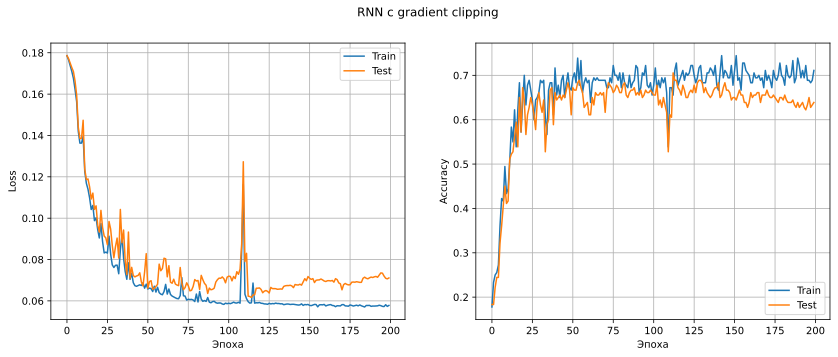

In [28]:
rnn = nn.RNN(24, 80, batch_first=True)
model = Simple_RNN_Classifier(24, 80, 6, rnn, nn.ReLU()).to(device).float()


optimizer = optim.Adam(model.parameters(), lr=5e-4)
scheduler = StepLR(optimizer, step_size=100, gamma=0.9)

_, _, grad_history_clip = get_exps(model, optimizer, scheduler, 'RNN с gradient clipping', num_epoch=200, max_norm=20)

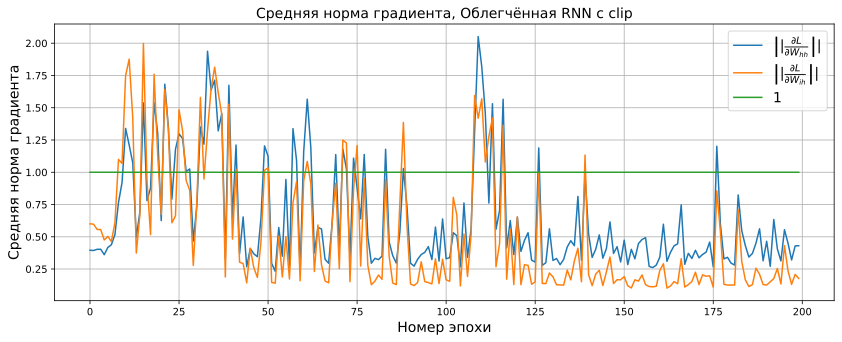

In [29]:
plot_grads(grad_history_clip, 'Облегчённая RNN с clip')

Как можно заметить, модель стала меньше флуктуировать, однако она все еще уступает другим моделям. Возможно дело в том, что градиент достаточно мал уже в самом начале или в том, что мы не решили проблему затухания в принципе. Попробуем исправить это ортогональной инициализацией

### `Gradient clipping + orthogonal initialization`

  0%|          | 0/200 [00:00<?, ?it/s]

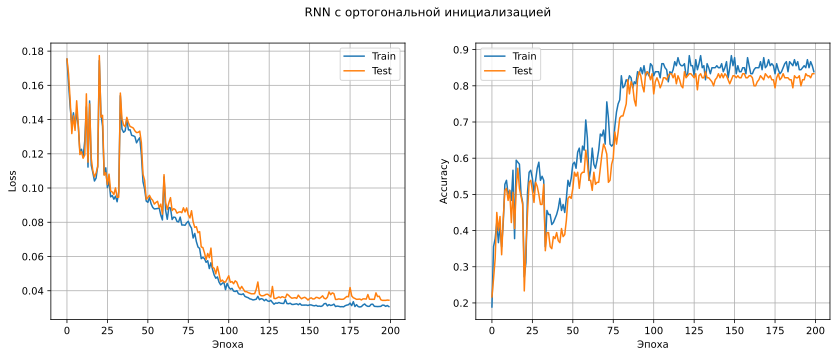

In [30]:
rnn = nn.RNN(24, 80, batch_first=True)
model = Simple_RNN_Classifier(24, 80, 6, rnn, nn.ReLU(), dropout_p=0.5).to(device).float()

# Ортогональная иницализация
for p in model.parameters():
    if len(p.shape) == 2:
        nn.init.orthogonal_(p)


optimizer = optim.Adam(model.parameters())
scheduler = StepLR(optimizer, step_size=100, gamma=0.9)

_, _, grad_history_init_clip = get_exps(model, optimizer, scheduler, 'RNN с ортогональной инициализацией', 
                                        num_epoch=200, max_norm=10)

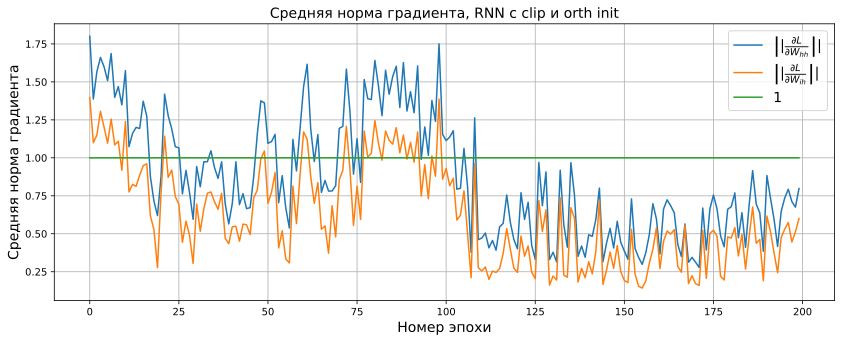

In [31]:
plot_grads(grad_history_init_clip, 'RNN с clip и orth init')

Как итог можно заявить, что модель классическая RNN модель обучается, но очень нестабильно. Что важно, качество на train и test примерно одинаковое, т.е. скачет общее качество модели. Применение специальных техник в данном случае дало существенное улучшение в качестве.

В то же время использование LSTM позволяет получить отличное качество на данном примере.

### `Bidirectional и Stacked LSTM`

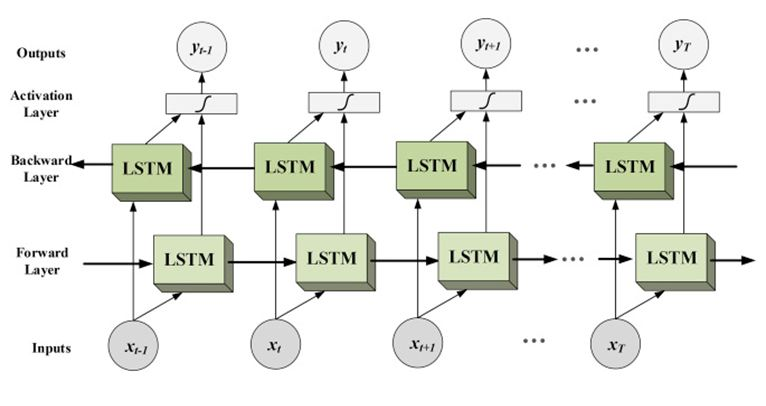



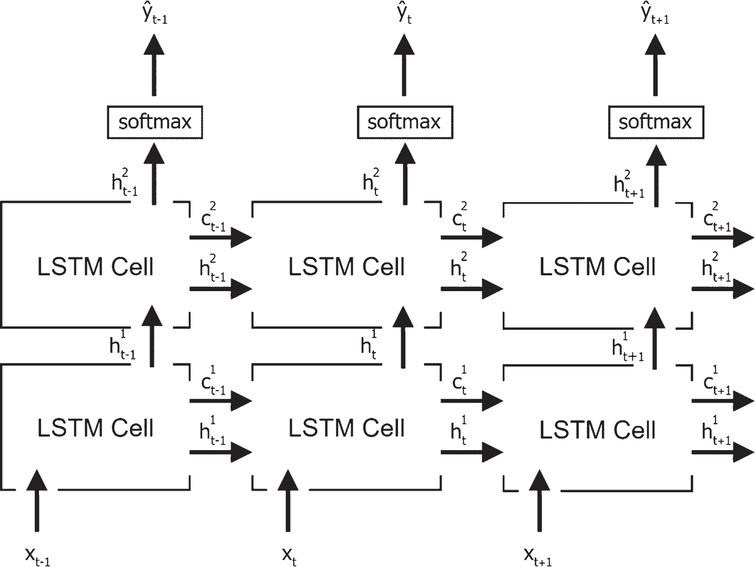

<div class="alert alert-danger"> 
Допустим вы хотите применить BiLSTM и сделать модель с 3 LSTM друг поверх друга. Тогда в базовой версии pytorch вы получите 6 LSTM - 3 пары. Более того, пусть input_size = 11,  hidden_size = 100, тогда все пары LSTM будет иметь матрицы $W_{hh}$ размера $400 \times 100$, выход будет иметь размерность $200$ (вектор размерности 100 от первой модели и 100 от второй). Однако матрицы $W_{ih}$ по парам будут иметь размеры $400 \times 11$, $400 \times 200$, $400 \times 200$ соответственно
</div>

В модели 342400 + 8686 параметров


  0%|          | 0/200 [00:00<?, ?it/s]

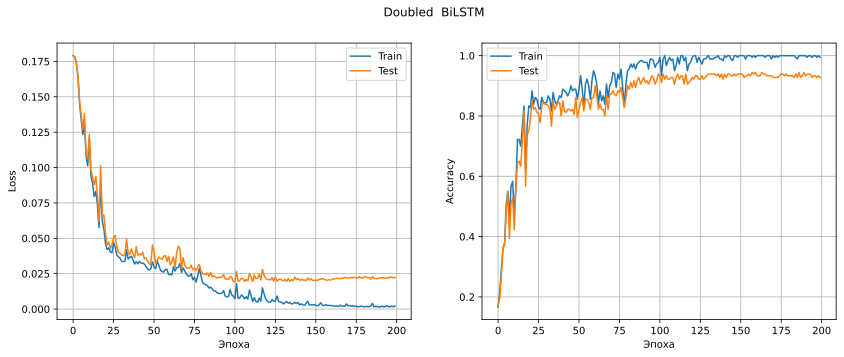

In [32]:
input_size = 24
hidden_size = 100

lstm = nn.LSTM(24, 100, batch_first=True, num_layers=2, bidirectional=True)
model = Simple_RNN_Classifier(24, 2 * 100, 6, lstm, nn.ReLU()).to(device).float()
x, y = sum(p.numel() for p in lstm.parameters()), sum(p.numel() for p in model.parameters())
print(f'В модели {x} + {y - x} параметров')

optimizer = optim.Adam(model.parameters(), lr=5e-4)
scheduler = StepLR(optimizer, step_size=100, gamma=0.9)

_, _, grad_history_BiLSTM = get_exps(model, optimizer, scheduler, 'Doubled  BiLSTM', 200)

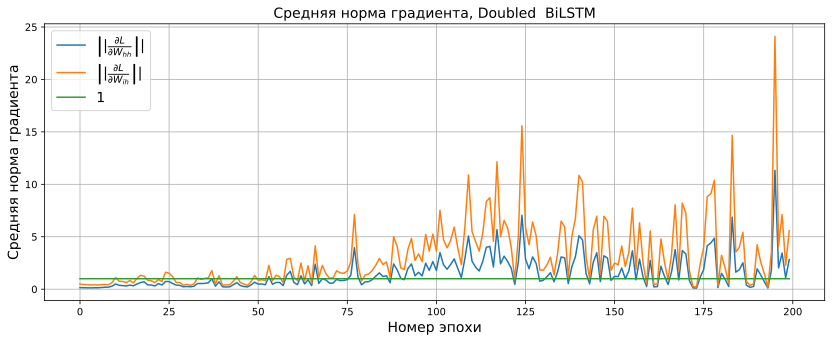

In [33]:
plot_grads(grad_history_BiLSTM, 'Doubled  BiLSTM')

In [34]:
for p in list(lstm.parameters()):
    print(p.shape)

torch.Size([400, 24])
torch.Size([400, 100])
torch.Size([400])
torch.Size([400])
torch.Size([400, 24])
torch.Size([400, 100])
torch.Size([400])
torch.Size([400])
torch.Size([400, 200])
torch.Size([400, 100])
torch.Size([400])
torch.Size([400])
torch.Size([400, 200])
torch.Size([400, 100])
torch.Size([400])
torch.Size([400])


Большая сложность модели привела к более гладкому обучению. Графики флуктуируют намного меньше, чем для обычной LSTM.

На данной задаче LSTM показала [SOTA качество](http://www.timeseriesclassification.com/results.php) (нужно учесть, что задача NATOPS максимально простая)

# `4. Тестирование 'памяти' рекуррентных нейронных сетей`

Для проверки способности вашей модели запоминать информацию на долгий период стандартно используется набор PSMNIST. ([Хотя он несколько подвергается критике](https://arxiv.org/pdf/1805.09733.pdf))

PermutedSequentialMNIST - датасет получаемый перестановкой пикселей в случайном порядке (фиксирован и един для всех картинок), причём полученый объект рассматривается как последовательность длины $28 \cdot 28$, с одномерной проекцией.

(10000, 1, 28, 28)

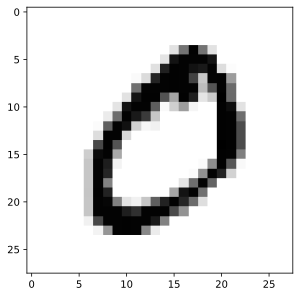

In [35]:
from torchvision import transforms

# Загрузка обычного MNIST
transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.1307,), (0.3081,))
        ])
train_dataset = torchvision.datasets.MNIST('../data', train=True, download=True, transform=transform)
test_dataset = torchvision.datasets.MNIST('../data', train=False, download=True, transform=transform)

train_MNIST = torch.utils.data.DataLoader(train_dataset, batch_size = 10000)
test_MNIST = torch.utils.data.DataLoader(test_dataset, batch_size = 10000)

plt.imshow(next(iter(train_MNIST))[0][1][0].cpu().numpy(), cmap='Greys')
next(iter(train_MNIST))[0].cpu().numpy().shape

Для получения PSMNIST достаточно добавить преобразование перестановки пикселей. Отметим, что все преобразования делаются до перевода данных на GPU

In [36]:
class Image_permutation():
    """
    Перестановка пикселей в картинке
    """
    def __init__(self, c, h, w, permutation=None, flatten_flag=False):
        """
        c, h, w - параметры картинки
        permutation - перестановка, если None - генерируем новую
        flatten_flag - если False, то возвращаем объект вида c x h x w
                       если True, то c * h * w x 1
        """
        self.h = h
        self.w = w
        if permutation is not None:
            self.permutation = permutation
        else:
            self.permutation = torch.randperm(c * h*w)
        self.flatten_flag = flatten_flag

    def __call__(self, object):
        if self.flatten_flag:
            return object.flatten()[self.permutation].reshape(-1, 1)
        else:
            return object.flatten()[self.permutation].reshape((c, self.h, self.w))
            
    

(1000, 784, 1)

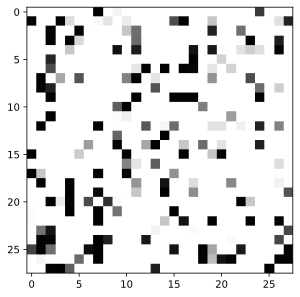

In [37]:
# Загрузка MNIST
transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.1307,), (0.3081,)),
        Image_permutation(1, 28, 28, flatten_flag=True) #Добавляем преобразование, переставляющее пиксели
        ])
train_dataset = torchvision.datasets.MNIST('../data', train=True, transform=transform)
test_dataset = torchvision.datasets.MNIST('../data', train=False, transform=transform)

train_PSMNIST = torch.utils.data.DataLoader(train_dataset, batch_size = 1000)
test_PSMNIST = torch.utils.data.DataLoader(test_dataset, batch_size = 1000)

plt.imshow(next(iter(train_PSMNIST))[0][1].cpu().numpy().reshape(28, 28), cmap='Greys')
next(iter(train_PSMNIST))[0].cpu().numpy().shape

Показательно, LSTM намного лучше обычной RNN в данном случае, чем при подаче картинки 'построчно'

In [38]:
def evaluate_torch(model, device, data_loader):
    """
    Возвращает качество и лосс модели на выборке
    Данные из dataloader приходят в tuple (data, target)
    """
    model.eval()
    loss = 0
    correct = 0
    length = 0
    
    with torch.no_grad():
        for batch_idx, (data, target) in enumerate(data_loader):
            data, target = data.to(device), target.to(device)
            output = model(data)
            
            # Обновляем качество
            loss += F.nll_loss(output, target).item() 
            pred = output.argmax(dim=1) 
            correct += (pred == target).sum().item()
            length += data.shape[0]

    return loss / length, correct / length


def train_torch(model, device, train_loader, test_loader, n_epoch, optimizer, scheduler, 
          max_norm=None):
    """
    Обучение и оценивание качества на тесте одновременно
    Данные из dataloader приходят в tuple (data, target)
    """
    train_history, test_history = {'loss':[], 'acc':[]}, {'loss':[], 'acc':[]}
    
    for epoch in (pbar := tqdm(range(1, n_epoch + 1))):
        model.train()
        for batch_idx, (data, target) in enumerate(train_loader):
            data, target = data.to(device), target.to(device)
            
            # Делаем шаг по батчу
            optimizer.zero_grad()
            output = model(data)
            loss = F.nll_loss(output, target)
            loss.backward()
            
            # Gradient clipping
            if max_norm is not None:
                torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=max_norm)

            optimizer.step()
            scheduler.step()
            
        # Добавляем информацию
        loss, acc = evaluate_torch(model, device, train_loader)
        train_history['loss'].append(loss), train_history['acc'].append(acc)
        loss, acc = evaluate_torch(model, device, test_loader)
        test_history['loss'].append(loss), test_history['acc'].append(acc)
        pbar.set_description(f"Test accuracy {acc}")
        
    return train_history, test_history

In [39]:
class MNIST_LSTM_Classifier(nn.Module):
    def __init__(self, input_size, hidden_size, n_classes, rnn, activation, pixel_wise=False):
        super().__init__()
        self.pixel_wise = pixel_wise
        self.rnn = rnn
        
        # Классификатор - простой линейный слой
        self.classifier = nn.Sequential(
            nn.BatchNorm1d(hidden_size), nn.Linear(hidden_size, 32), activation, nn.Linear(32, n_classes)
        )

    def forward(self, input):
        
        # Размер входа в LSTM (N, L, M)
        if self.pixel_wise:
            # Наш ряд из Dataloader имеет представление (N, L, 1)
            1
        else:
            # Наш ряд из Dataloader имеет представление (N, С, H, W)
            N, L = input.shape[0], input.shape[2]
            input = input.reshape(N, L, -1)
        
        # Проход по LSTM
        output, hidden = self.rnn(input)
        
        # Размерность output (N, L, hidden)
        # Получаем h_L
        output = output[:, -1, :]    
        
        # Проводим классификацию
        output = self.classifier(output)
        output = F.log_softmax(output, dim=1)
        return output

In [60]:
train_loader = train_PSMNIST
test_loader = test_PSMNIST

Обучим LSTM, GRU, RNN (Elman) и сравним их способность запоминать длинные последовательности.

In [58]:
from time import time

def get_exps_PSMNIST(rnn, in_size, h_size, pixel_wise=False, n_epoch=60, lr=5e-3):
    start = time()

    rnn = rnn(in_size, h_size, batch_first=True)
    model2 = MNIST_LSTM_Classifier(in_size, h_size, 10, rnn, nn.ReLU(), pixel_wise=pixel_wise).to(device)

    x, y = sum(p.numel() for p in rnn.parameters()), sum(p.numel() for p in model2.parameters())
    print(f'В модели {x} + {y - x} параметров')

    optimizer = optim.Adam(model2.parameters(), lr=lr)

    scheduler = StepLR(optimizer, step_size=100, gamma=0.9)

    train_history_LSTM, test_history_LSTM = train_torch(model2, device, train_loader, test_loader, 
                                n_epoch, optimizer, scheduler)
    print('{} эпох обучались целых {:.2f} минут'.format(n_epoch, (time()-start)/60))
    
    return train_history_LSTM, test_history_LSTM

In [67]:
train_history_LSTM, test_history_LSTM = get_exps_PSMNIST(nn.LSTM, 1, 52, pixel_wise=True, n_epoch=60, lr=3e-2)

В модели 11440 + 2130 параметров


  0%|          | 0/60 [00:00<?, ?it/s]

60 эпох обучались целых 40.77 минут


In [47]:
train_history_GRU, test_history_GRU = get_exps_PSMNIST(nn.GRU, 1, 60, pixel_wise=True, n_epoch=60)

В модели 11340 + 2402 параметров


  0%|          | 0/60 [00:00<?, ?it/s]

60 эпох обучались целых 40.02 минут


In [48]:
train_history_RNN, test_history_RNN = get_exps_PSMNIST(nn.RNN, 1, 100, pixel_wise=True, n_epoch=60)

В модели 10300 + 3762 параметров


  0%|          | 0/60 [00:00<?, ?it/s]

60 эпох обучались целых 36.21 минут


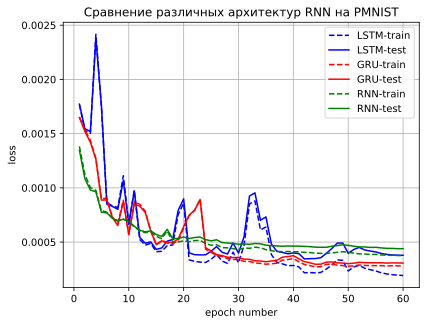

In [68]:
epochs = np.arange(60, dtype=int) + 1
plt.plot(epochs, train_history_LSTM['loss'], label='LSTM-train', c='b', linestyle='dashed')
plt.plot(epochs, test_history_LSTM['loss'], label='LSTM-test', c='b')
plt.plot(epochs, train_history_GRU['loss'], label='GRU-train', c='r', linestyle='dashed')
plt.plot(epochs, test_history_GRU['loss'], label='GRU-test', c='r')
plt.plot(epochs, train_history_RNN['loss'], label='RNN-train', c='g', linestyle='dashed')
plt.plot(epochs, test_history_RNN['loss'], label='RNN-test', c='g')
plt.grid()
plt.legend()
plt.ylabel('loss')
plt.xlabel('epoch number')
plt.title("Сравнение различных архитектур RNN на PMNIST")
plt.show()

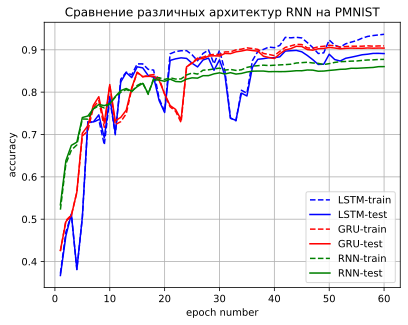

In [69]:
epochs = np.arange(60, dtype=int) + 1
plt.plot(epochs, train_history_LSTM['acc'], label='LSTM-train', c='b', linestyle='dashed')
plt.plot(epochs, test_history_LSTM['acc'], label='LSTM-test', c='b')
plt.plot(epochs, train_history_GRU['acc'], label='GRU-train', c='r', linestyle='dashed')
plt.plot(epochs, test_history_GRU['acc'], label='GRU-test', c='r')
plt.plot(epochs, train_history_RNN['acc'], label='RNN-train', c='g', linestyle='dashed')
plt.plot(epochs, test_history_RNN['acc'], label='RNN-test', c='g')
plt.grid()
plt.legend()
plt.ylabel('accuracy')
plt.xlabel('epoch number')
plt.title("Сравнение различных архитектур RNN на PMNIST")
plt.show()

Общее правило по использованию LSTM и GRU, полученное коммьюнити эмпирическим путем: последней рекуррентностью стоит использовать LSTM, а перед ней можно как и LSTM, так и GRU

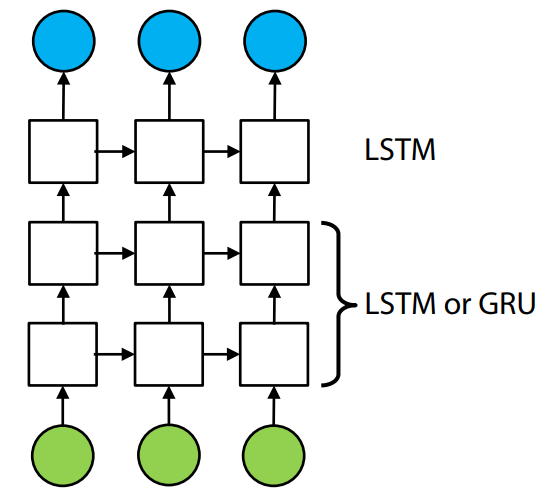

А теперь посмотрим как модели себя ведут на обычном MNIST

1. Длина последовательности $T = 28 = H$
2. Размерность проекции $M = 28 = W$

In [53]:
train_loader = train_MNIST
test_loader = test_MNIST

train_history_LSTM_MNIST, test_history_LSTM_MNIST = get_exps_PSMNIST(nn.LSTM, 28, 60, pixel_wise=False, n_epoch=20)

В модели 21600 + 2402 параметров


  0%|          | 0/20 [00:00<?, ?it/s]

20 эпох обучались целых 9.33 минут


In [54]:
train_history_GRU_MNIST, test_history_GRU_MNIST = get_exps_PSMNIST(nn.GRU, 28, 60, pixel_wise=False, n_epoch=20)

В модели 16200 + 2402 параметров


  0%|          | 0/20 [00:00<?, ?it/s]

20 эпох обучались целых 8.91 минут


In [55]:
train_history_RNN_MNIST, test_history_RNN_MNIST = get_exps_PSMNIST(nn.RNN, 28, 110, pixel_wise=False, n_epoch=20)

В модели 15400 + 4102 параметров


  0%|          | 0/20 [00:00<?, ?it/s]

20 эпох обучались целых 9.01 минут


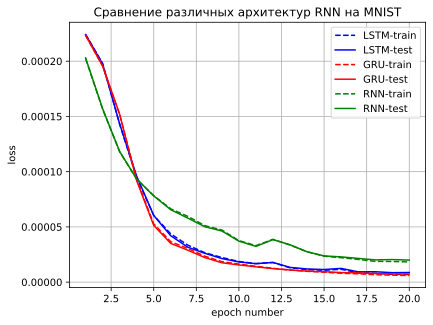

In [56]:
epochs = np.arange(20, dtype=int) + 1
plt.plot(epochs, train_history_LSTM_MNIST['loss'], label='LSTM-train', c='b', linestyle='dashed')
plt.plot(epochs, test_history_LSTM_MNIST['loss'], label='LSTM-test', c='b')
plt.plot(epochs, train_history_GRU_MNIST['loss'], label='GRU-train', c='r', linestyle='dashed')
plt.plot(epochs, test_history_GRU_MNIST['loss'], label='GRU-test', c='r')
plt.plot(epochs, train_history_RNN_MNIST['loss'], label='RNN-train', c='g', linestyle='dashed')
plt.plot(epochs, test_history_RNN_MNIST['loss'], label='RNN-test', c='g')
plt.grid()
plt.legend()
plt.ylabel('loss')
plt.xlabel('epoch number')
plt.title("Сравнение различных архитектур RNN на MNIST")
plt.show()

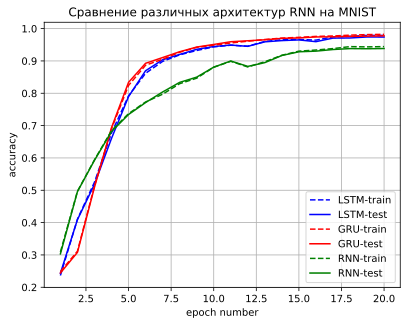

In [57]:
epochs = np.arange(20, dtype=int) + 1
plt.plot(epochs, train_history_LSTM_MNIST['acc'], label='LSTM-train', c='b', linestyle='dashed')
plt.plot(epochs, test_history_LSTM_MNIST['acc'], label='LSTM-test', c='b')
plt.plot(epochs, train_history_GRU_MNIST['acc'], label='GRU-train', c='r', linestyle='dashed')
plt.plot(epochs, test_history_GRU_MNIST['acc'], label='GRU-test', c='r')
plt.plot(epochs, train_history_RNN_MNIST['acc'], label='RNN-train', c='g', linestyle='dashed')
plt.plot(epochs, test_history_RNN_MNIST['acc'], label='RNN-test', c='g')
plt.grid()
plt.legend()
plt.ylabel('accuracy')
plt.xlabel('epoch number')
plt.title("Сравнение различных архитектур RNN на MNIST")
plt.show()

Действительно, даже для таких длинных последовательностей наши модели оказались применимы, что говорит о том, что с памятью у них все в порядке. Отметим, что время обучения на PSMNIST в 2 раза привысило время обучения на MNIST. Это вызвано недостатком памяти GPU. Другая проблема заключается в постоянном использовании питоновских циклов при проходе по RNN - отсутствии параллельности. Этот аспект в целом является главной проблемой рекуррентных сетей.

Рассмотрим следующую таблицу, сравнивающую теоретическую эффективность моделей, работающих с последовательностями. Приводится в статье [модель S4](https://arxiv.org/pdf/2111.00396.pdf). 

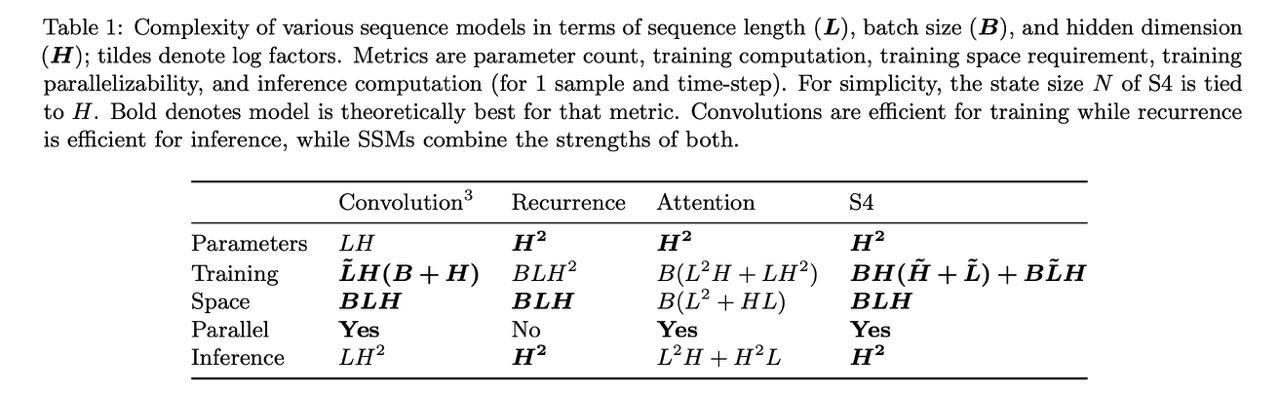

Вывод в рекуррентной модели на каждом шаге производится за $H^2$, т.е. не зависит от длины последовательности. 

Время обучения также асимптотически линейно от длины последовательности. Однако нужно понимать, что в данном случае скорость RNN по длине является скоростью перехода по питоновским циклам, а для свёрточной сети связана с длиной свёртки, т.е. в первом случае отсутсвует возможность параллельного вычисления. Поэтому на практике при большой длине L RNN сильно уступает в скорости свёрточной модели на этапе обучения (в качестве примера сверточной архитектуры для обработки последовательностей рекомендуется посмотреть [InceptionTime](https://arxiv.org/pdf/1909.04939.pdf). Более того, современные архитектуры на основе механизма внимания также могут учиться быстрее рекуррентных сетей за счет параллельности и эффективной реализации ([FlashAttentionV2](https://arxiv.org/abs/2307.08691). Однако, для сверхбольших последовательностей и этого уже недостаточно, и человечество разработало новый подход, выраженный в лице [модели S4](https://arxiv.org/pdf/2111.00396.pdf) и [Mamba](https://arxiv.org/pdf/2312.00752.pdf). Но в прошлом году появилась статья, которая говорит о том, что в таких задачах RNN [тоже могут быть конкурентноспособны](https://arxiv.org/pdf/2303.06349.pdf), однако, на задачах из этого ноутбука LRU не завелась в нормальном виде.

Ссылки на некоторые материалы:

[Полный разбор LSTM и RNN с их градиентами.](https://arxiv.org/pdf/1808.03314.pdf) 

Также при подготовке к данному семинару использовались следующие открытые источника:

https://mmuratarat.github.io/2019-02-07/bptt-of-rnn

https://github.com/amanchadha/coursera-deep-learning-specialization/tree/master/C5%20-%20Sequence%20Models